# Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
pd.set_option('display.max_columns', None)

### Help Functions

In [4]:
import pandas
def add_weatherFeature(region: str, feature: str, weather_history: pandas.core.frame.DataFrame):
    '''
    This function returns the feature [tempC, tempF,winddirDegree...]
    of weather choosen by region with resample period.
    '''
    
    feature_index = weather_history[weather_history['region'] == region].index
    return(weather_history[weather_history['region'] == region].groupby(by=feature_index).mean().resample('1H').bfill()[feature])

In [5]:
import pandas
def hourly_weather(region: str, weather_history: pandas.core.frame.DataFrame):
    '''
    This function returns a dataframe of a reagion with its corresponding
    weather features.
    '''
    
    data = ercot_hourly[[region]].copy()
    data['tempC'] = add_weatherFeature(region, 'tempC', weather_history)
    data['windspeedMiles'] = add_weatherFeature(region, 'windspeedMiles', weather_history)
    data['winddirDegree'] = add_weatherFeature(region, 'winddirDegree', weather_history)
    data['precipMM'] = add_weatherFeature(region, 'precipMM', weather_history)
    data['humidity'] = add_weatherFeature(region, 'humidity', weather_history)
    data['visibility'] = add_weatherFeature(region, 'visibility', weather_history)
    data['pressure'] = add_weatherFeature(region, 'pressure', weather_history)
    data['cloudcover'] = add_weatherFeature(region, 'cloudcover', weather_history)
    data['HeatIndexC'] = add_weatherFeature(region, 'HeatIndexC', weather_history)
    data['DewPointC'] = add_weatherFeature(region, 'DewPointC', weather_history)
    data['WindChillC'] = add_weatherFeature(region, 'WindChillC', weather_history)
    data['WindGustKmph'] = add_weatherFeature(region, 'WindGustKmph', weather_history)
    data['FeelsLikeC'] = add_weatherFeature(region, 'FeelsLikeC', weather_history)
    data['uvIndex'] = add_weatherFeature(region, 'uvIndex', weather_history)
    data.dropna(inplace=True)
    
    return(data)

In [6]:
import pandas
def plot_corrMap(data: pandas.core.frame.DataFrame, weather_history: pandas.core.frame.DataFrame):
    
    f, ax = plt.subplots(figsize=(12, 6))
    data = data.reset_index(drop=True)
    sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Load Data

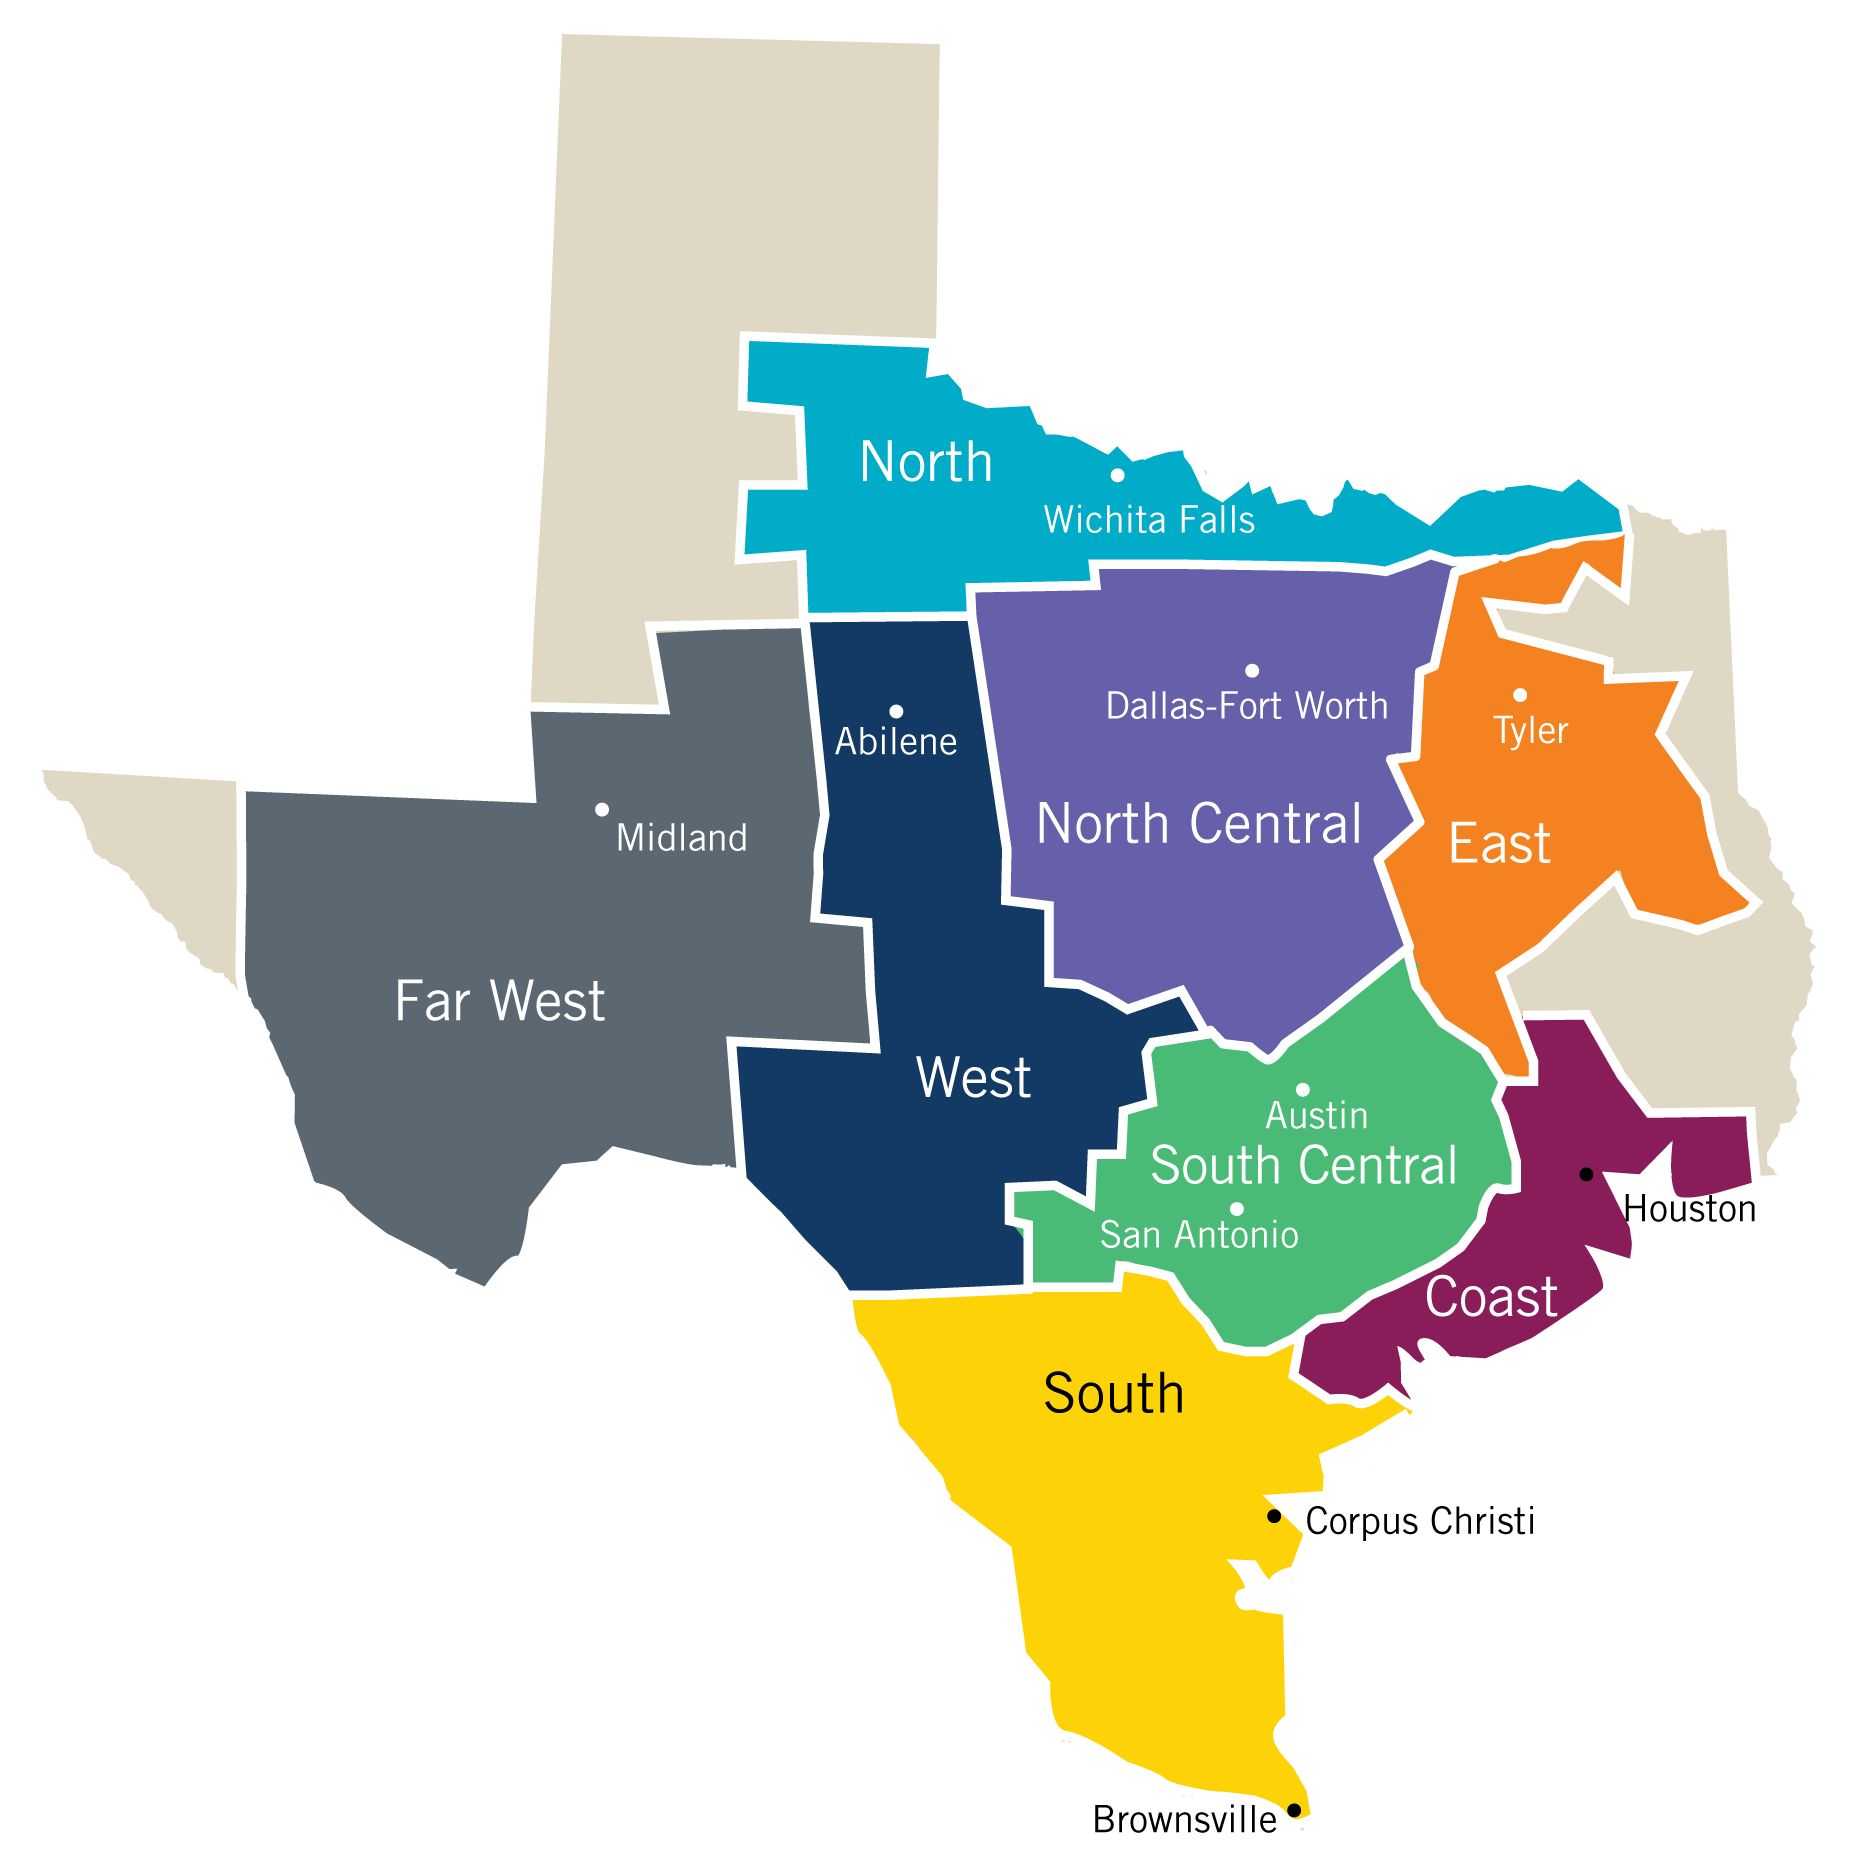

In [4]:
# load map 
Image("./datathon-code/data/ercotWeatherZoneMap.png")

In [5]:
# load data

# path folder
path = './datathon-code/data'

# hourly power demand
ercot_hourly = pd.read_csv(path+'/ercot_hourly_load.csv', parse_dates=True)
ercot_hourly['Hour_Ending']= pd.to_datetime(ercot_hourly['Hour_Ending'],utc= True)
ercot_hourly.set_index('Hour_Ending',inplace=True)
ercot_hourly = ercot_hourly.tz_convert('US/Central') # Time Zone adjustment

# weather forecast 2 weeks 
weather_forecast = pd.read_csv(path+'/weather_forecast.csv')

In [6]:
ercot_hourly.head()# weather history from 2008 to 2021
weather_history = pd.read_csv(path+'/weather_history.csv')

# Data Undesrstanding

### HOUR COMSUMPTION

## General

In [7]:
ercot_hourly.head()

Coast        East    Far West       North  \
Hour_Ending                                                                  
2005-01-01 01:00:00-06:00  7507.810731  850.313988  998.465500  741.963778   
2005-01-01 02:00:00-06:00  7257.549136  818.143264  987.532852  711.996586   
2005-01-01 03:00:00-06:00  6973.987199  783.396624  978.575662  687.881144   
2005-01-01 04:00:00-06:00  6794.489296  760.639635  959.486947  673.419383   
2005-01-01 05:00:00-06:00  6685.186677  743.371691  955.268590  664.792118   

                           North Central        South  South Central  \
Hour_Ending                                                            
2005-01-01 01:00:00-06:00    7312.259820  1883.979457    3728.400885   
2005-01-01 02:00:00-06:00    7012.466197  1798.234153    3562.614723   
2005-01-01 03:00:00-06:00    6712.807281  1712.758395    3373.868049   
2005-01-01 04:00:00-06:00    6502.378446  1651.210254    3239.047417   
2005-01-01 05:00:00-06:00    6440.559639  1627.872766    3176.859720   

                                 West  
Hour_Ending                            
2005-01-01 01:00:00-06:00  692.294503  
2005-01-01 02:00:00-06:00  675.176013  
2005-01-01 03:00:00-06:00  659.650453  
2005-01-01 04:00:00-06:00  648.512894  
2005-01-01 05:00:00-06:00  647.001780

In [8]:
ercot_hourly.describe()

Coast           East       Far West          North  \
count  144190.000000  144190.000000  144190.000000  144190.000000   
mean    11020.165969    1408.889472    1957.988773     914.143612   
std      2639.165234     334.465710     860.828691     257.185310   
min      1702.829343     737.857378     872.014264     488.272293   
25%      9124.673606    1175.572512    1259.840128     730.908815   
50%     10470.369597    1337.403946    1661.527086     846.547133   
75%     12469.016812    1590.619763    2401.473185    1038.023137   
max     21256.115190    2949.198517    4636.980000    2305.722761   

       North Central          South  South Central           West  
count  144190.000000  144190.000000  144190.000000  144190.000000  
mean    12641.894692    3066.136733    6313.757754    1083.276105  
std      3491.937276     841.696810    1724.632327     252.393621  
min      6211.523935    1351.410393    3055.595655     571.771569  
25%     10235.976594    2438.233366    5104.164142     900.163097  
50%     11802.471428    2921.862234    5908.971214    1041.306557  
75%     14422.563681    3560.635550    7229.054786    1223.457715  
max     26499.240955    6192.252947   14166.701623    2564.305175

In [9]:
ercot_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144191 entries, 2005-01-01 01:00:00-06:00 to 2021-06-14 00:00:00-05:00
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Coast          144190 non-null  float64
 1   East           144190 non-null  float64
 2   Far West       144190 non-null  float64
 3   North          144190 non-null  float64
 4   North Central  144190 non-null  float64
 5   South          144190 non-null  float64
 6   South Central  144190 non-null  float64
 7   West           144190 non-null  float64
dtypes: float64(8)
memory usage: 9.9 MB


In [10]:
ercot_hourly.isna().sum()

Coast            1
East             1
Far West         1
North            1
North Central    1
South            1
South Central    1
West             1
dtype: int64

### Observations:
For just one value missing i'll just use a backfill.

In [3]:
# fill missing values with back value
ercot_hourly.fillna(method='backfill',inplace=True)

## Seasonality

### By Year

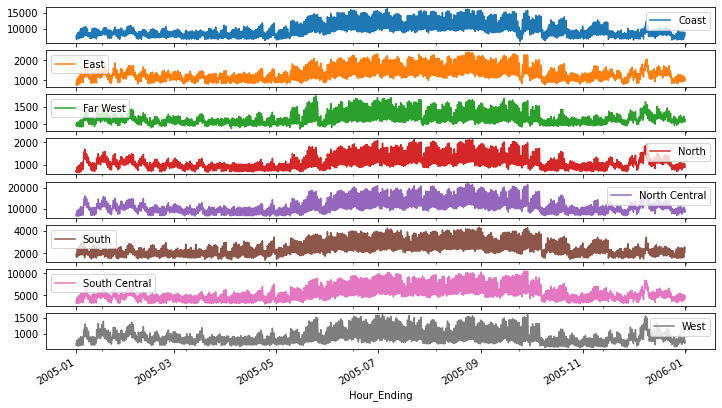

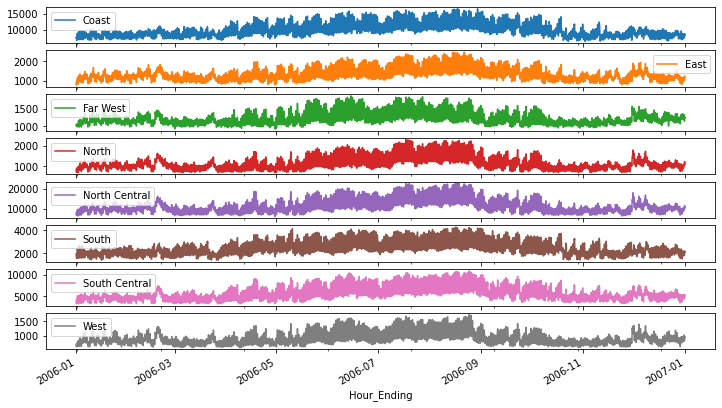

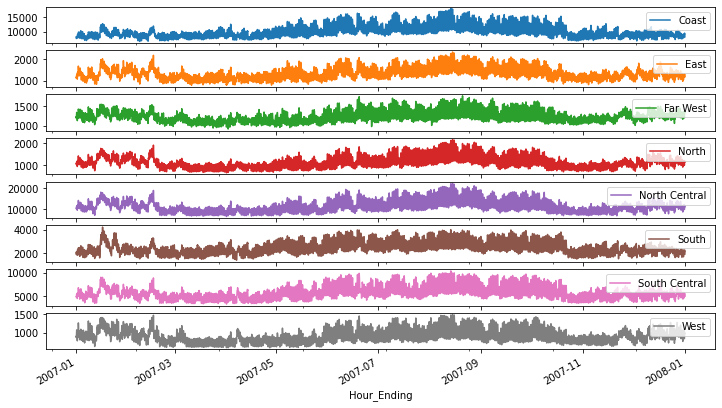

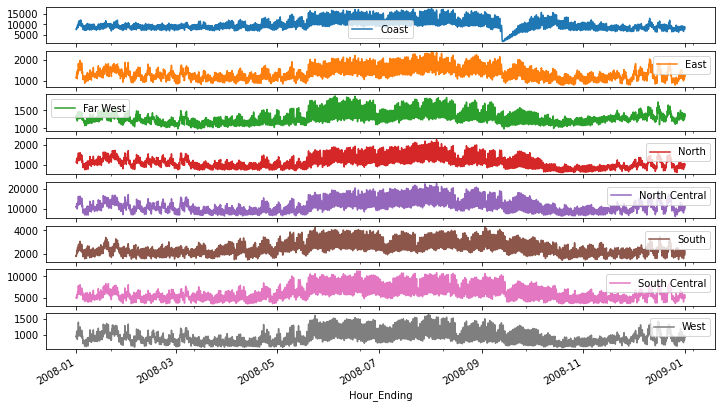

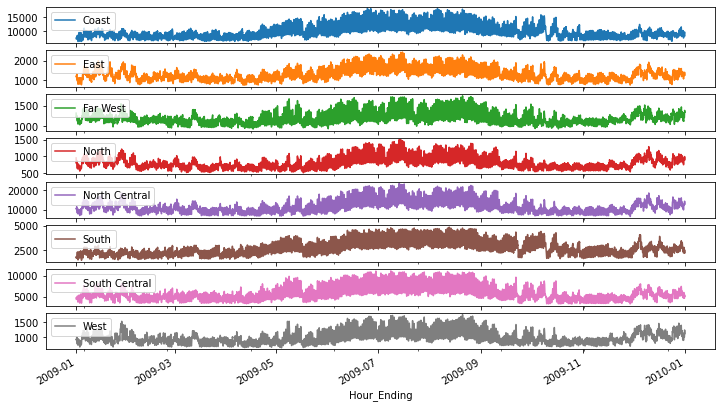

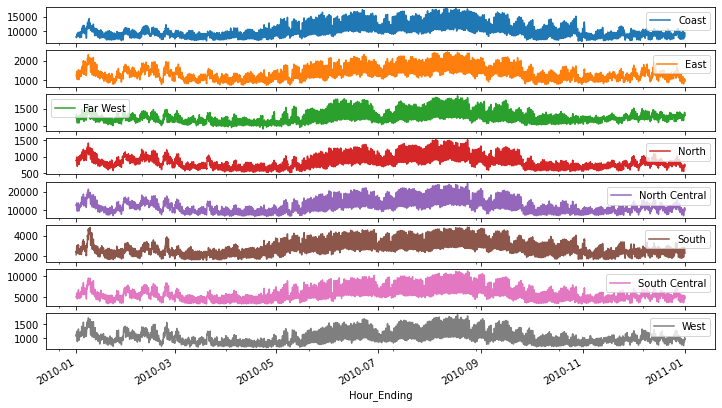

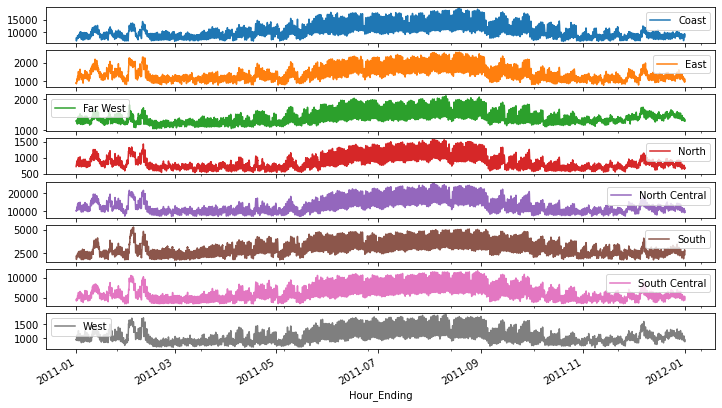

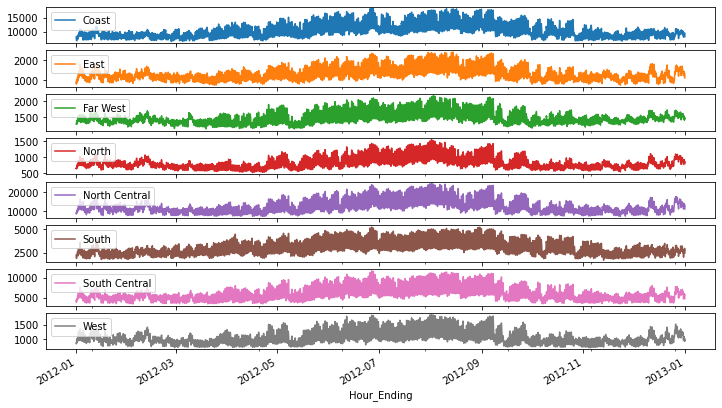

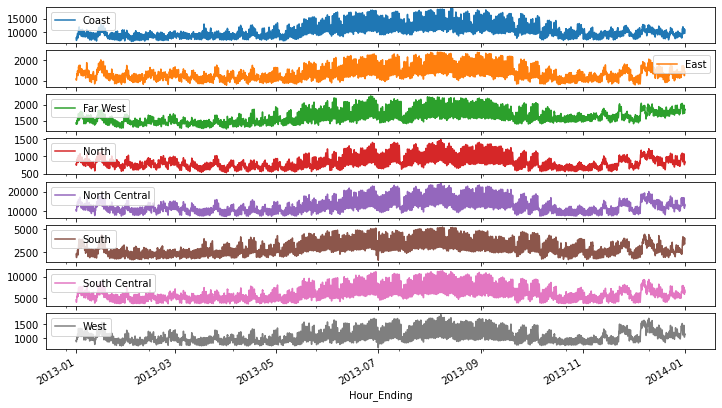

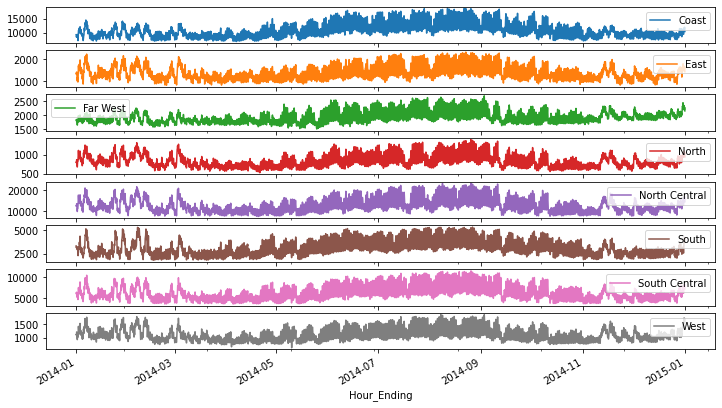

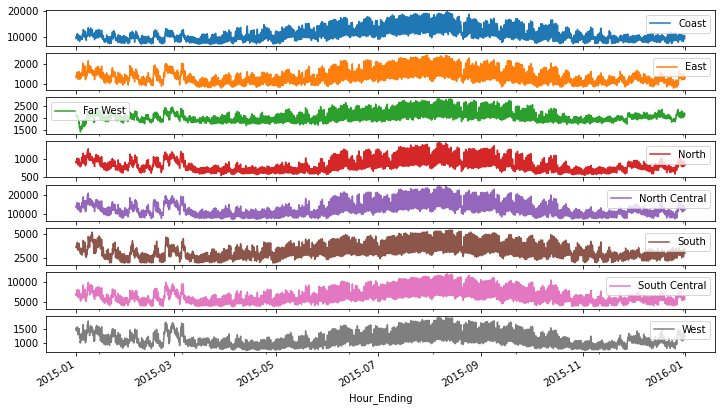

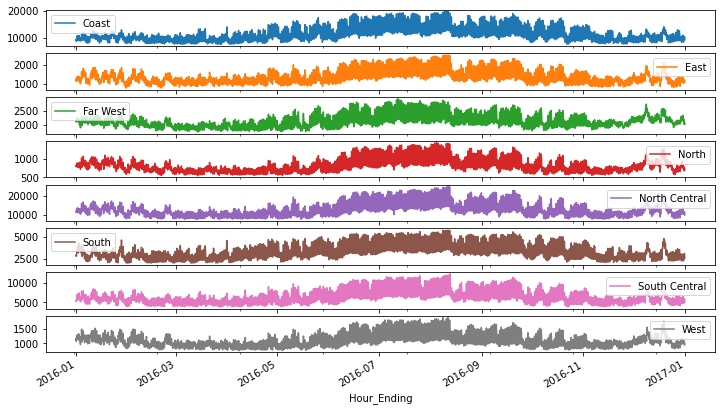

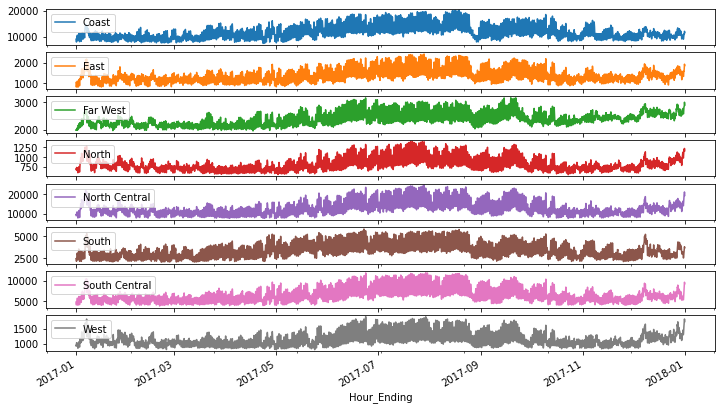

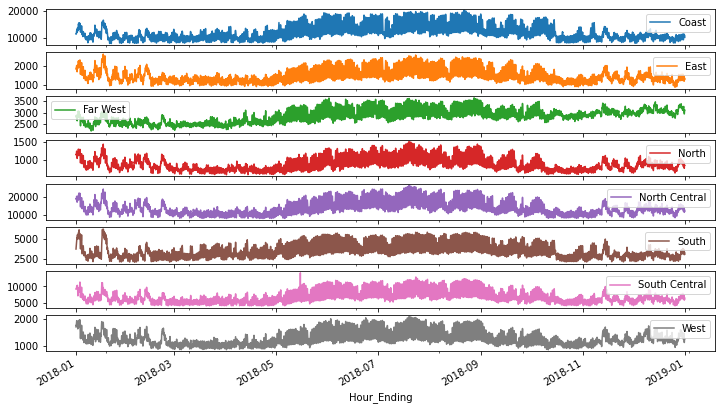

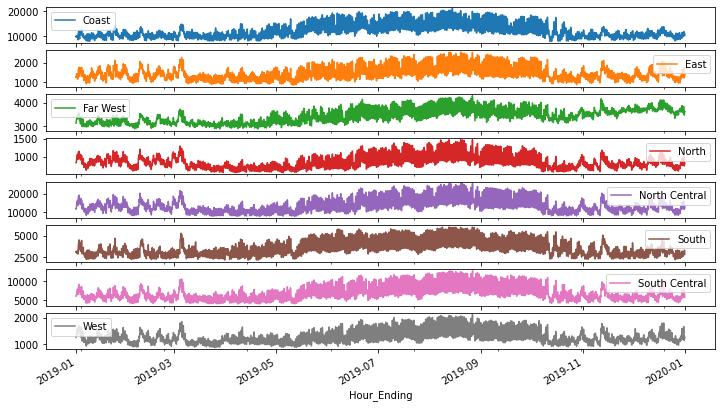

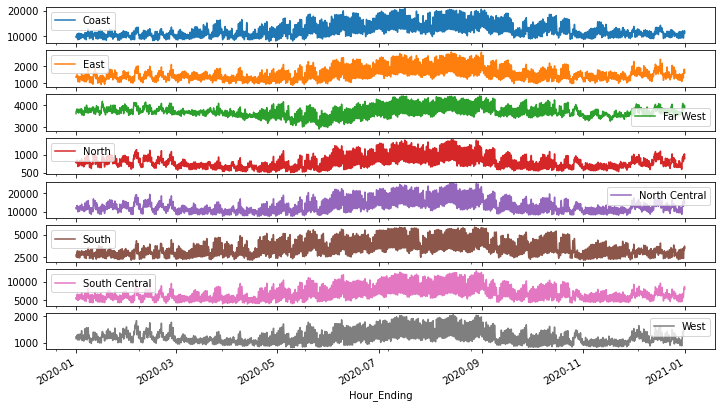

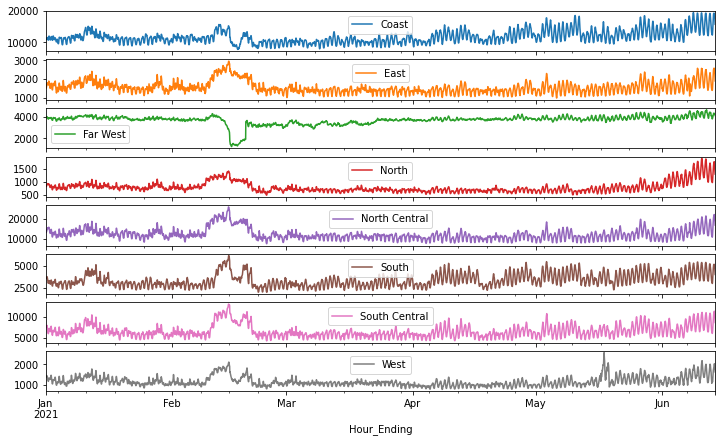

In [41]:
ercot_hourly.groupby(by=[ercot_hourly.index.year]).plot(subplots=True, figsize=(12,7));

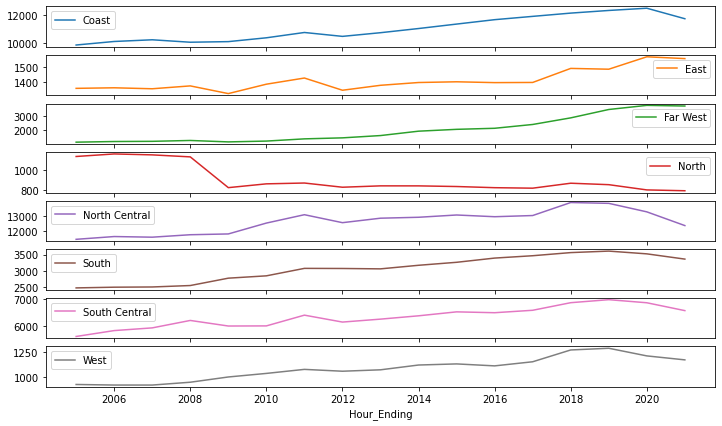

In [52]:
ercot_hourly.groupby(by=[ercot_hourly.index.year]).mean().plot(subplots=True, figsize=(12,7));

### By Month 

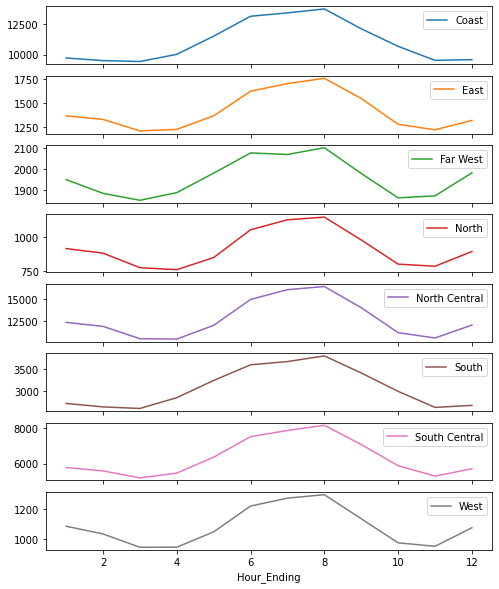

In [37]:
ercot_hourly.groupby(by=[ercot_hourly.index.month]).mean().plot(subplots=True, figsize=(15,8));

### By Week

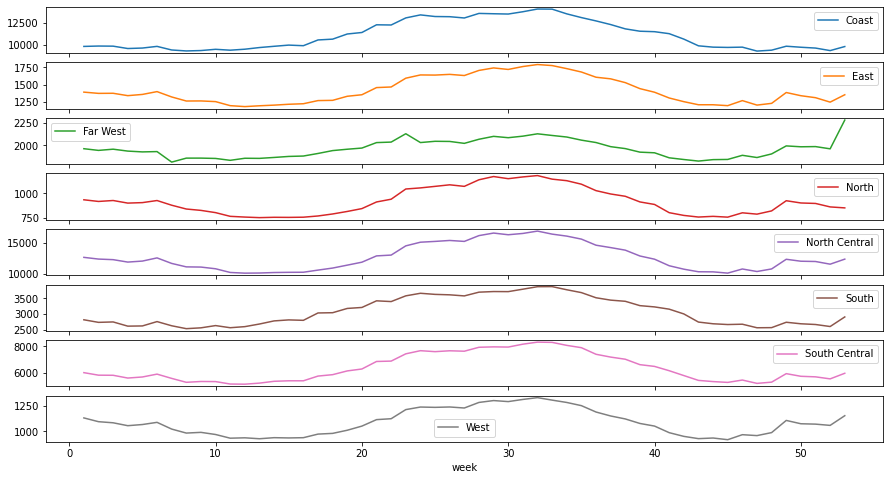

In [44]:
ercot_hourly.groupby(by=[ercot_hourly.index.isocalendar().week]).mean().plot(subplots=True, figsize=(15,8));

### By Day

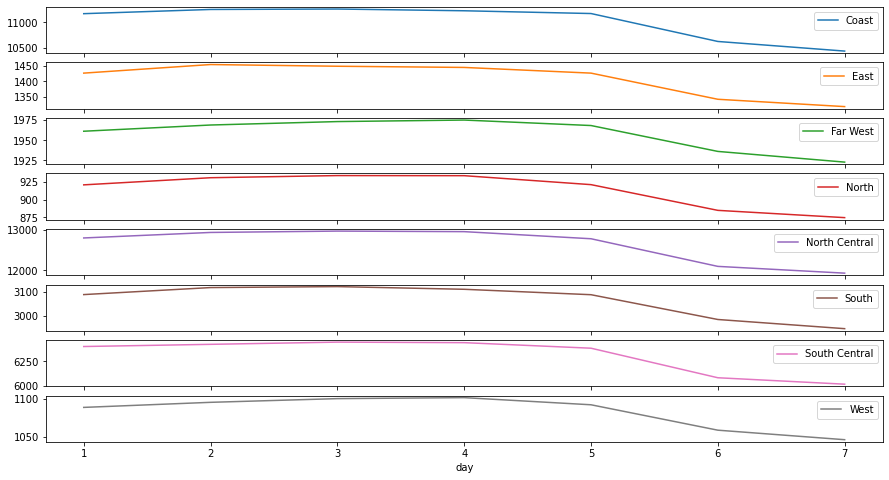

In [47]:
ercot_hourly.groupby(by=[ercot_hourly.index.isocalendar().day]).mean().plot(subplots=True, figsize=(15,8));

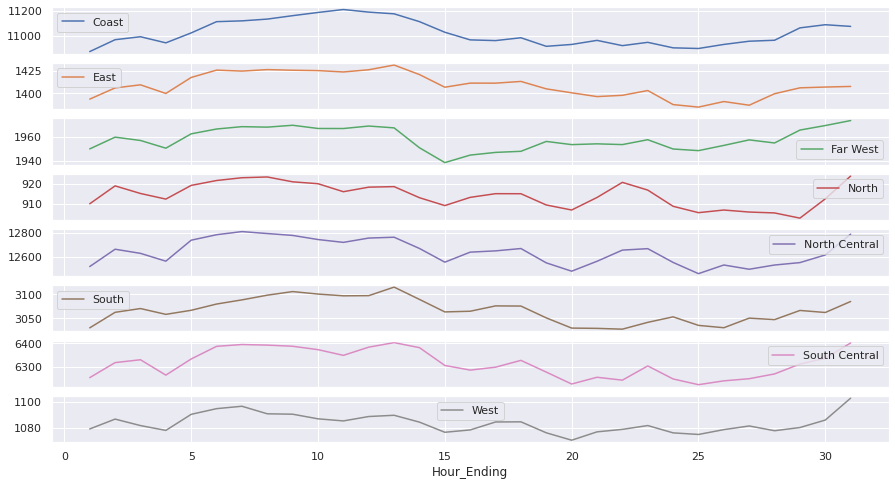

In [78]:
ercot_hourly.groupby(by=[ercot_hourly.index.day]).mean().plot(subplots=True, figsize=(15,8));

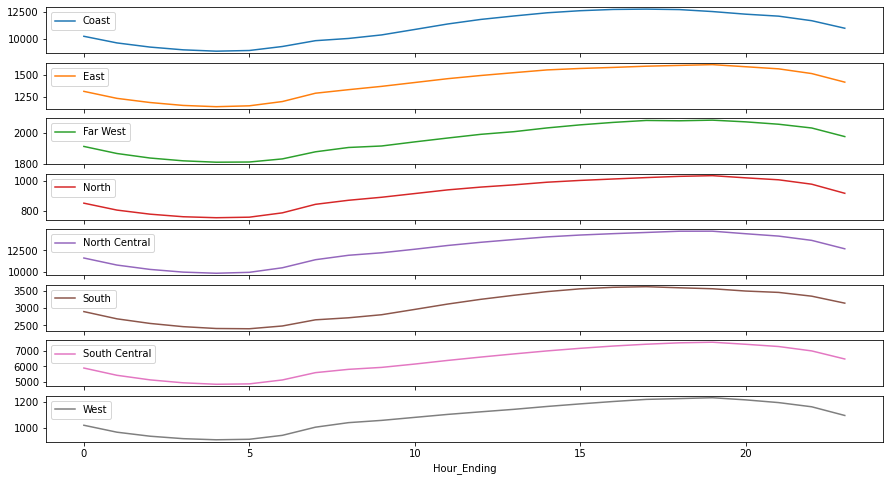

In [50]:
ercot_hourly.groupby(by=[ercot_hourly.index.hour]).mean().plot(subplots=True, figsize=(15,8));

The **seasonal_plot** was imported from this link:

https://gist.github.com/arthurcgusmao/39905499340d28fa59834f652905dcec


In [63]:
def seasonal_plot(df, season='year', index='month', column=None):
    """Makes a seasonal plot of one column of the input dataframe. Considers the first columns by default.
    
    Arguments:
    
    - df (Pandas DataFrame): DataFrame indexed by Datetime (see `parse_dates` parameter when reading a CSV);
    - season (string): the season that you want to considering when doing the plot, e.g., year, month, etc.;
    - index (string): corresponds to the X axis of the plot. You should choose based on the index period that you're using;
    - column (string, optional): the DataFrame column to consider. Picks the first one by default.
    """
    if column == None:
        column = df.columns[0]
        
    piv_index = getattr(df.index, index)
    piv_season = getattr(df.index, season)
    
    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(12,8))

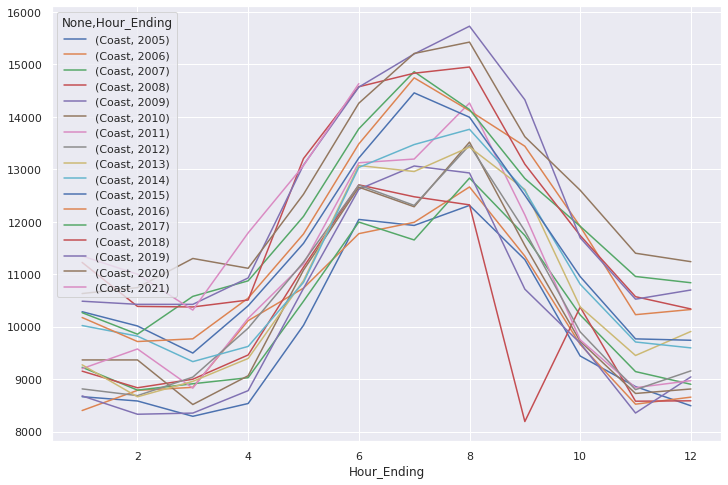

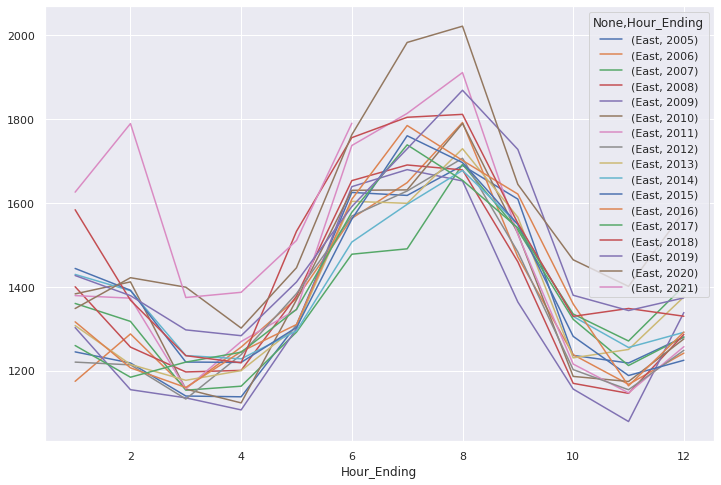

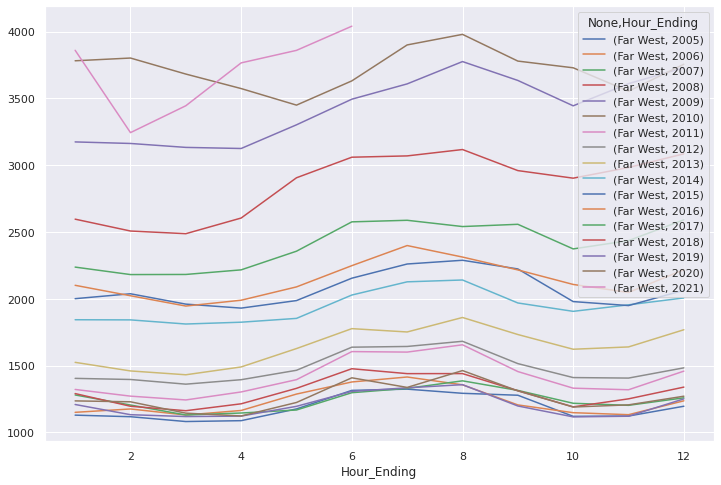

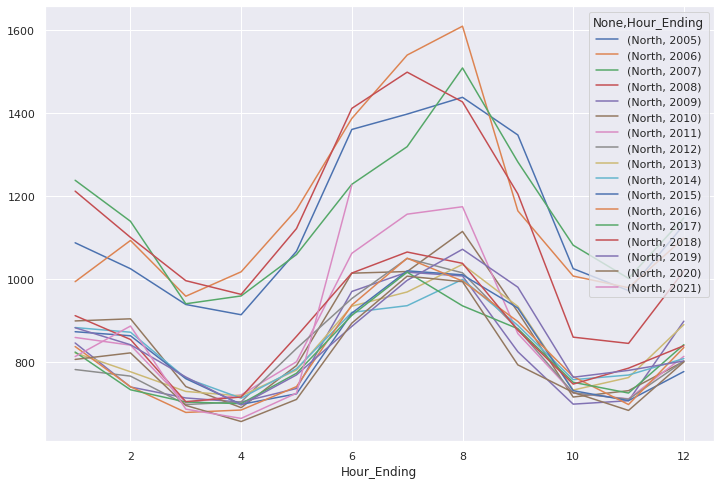

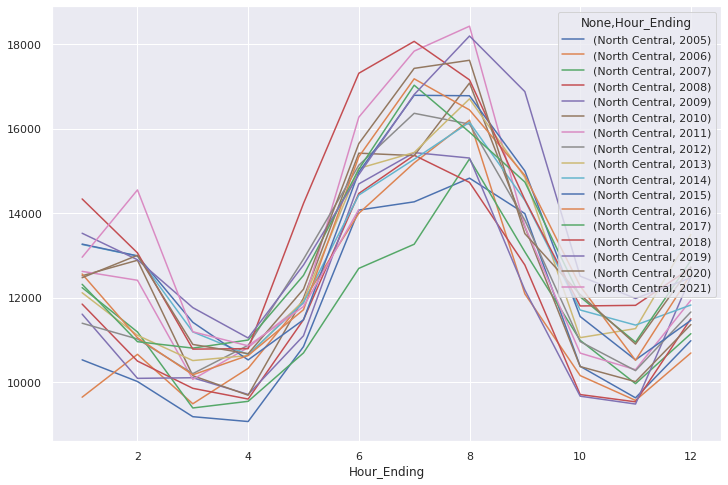

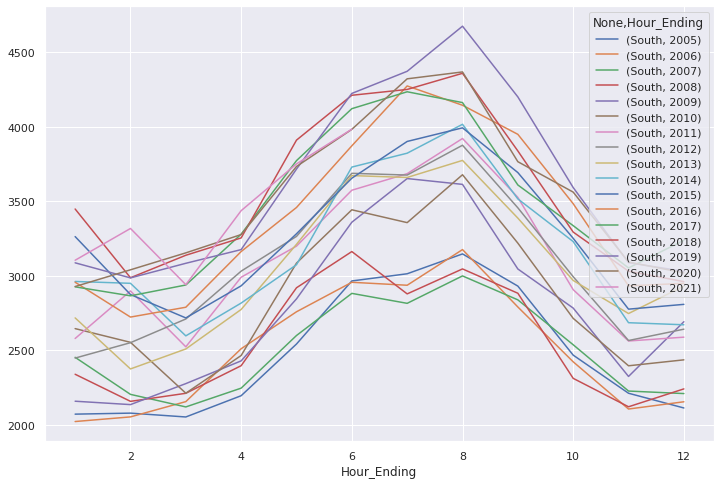

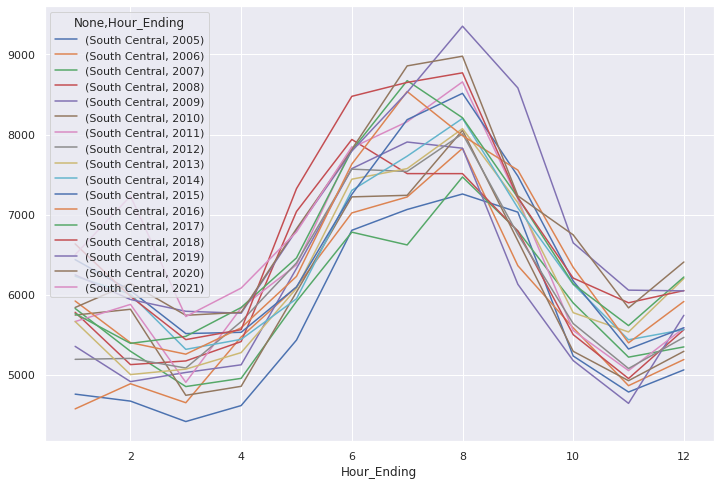

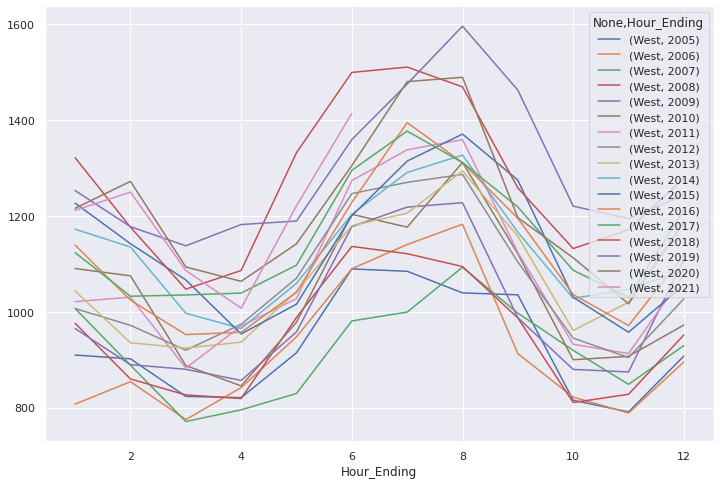

In [69]:
for region in ercot_hourly.columns:
    seasonal_plot(ercot_hourly, column=region)

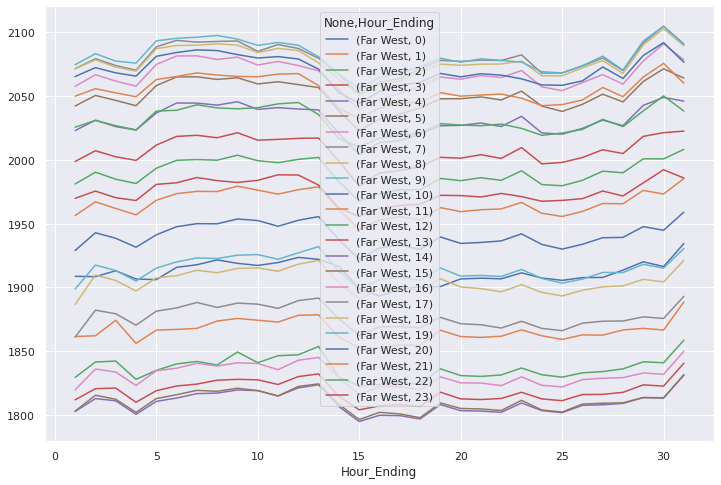

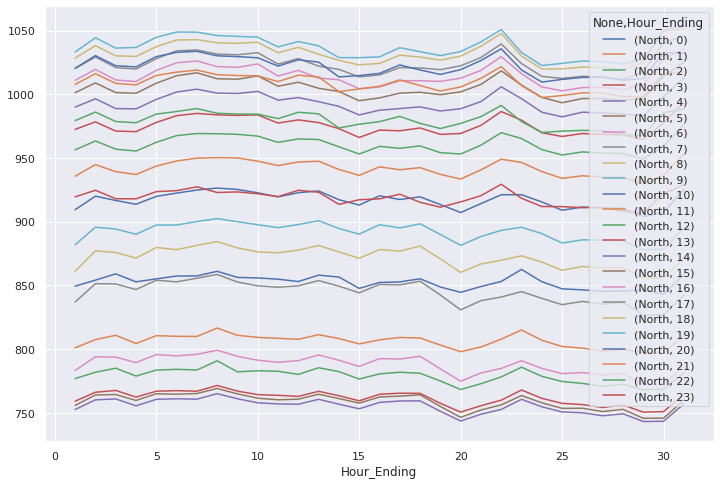

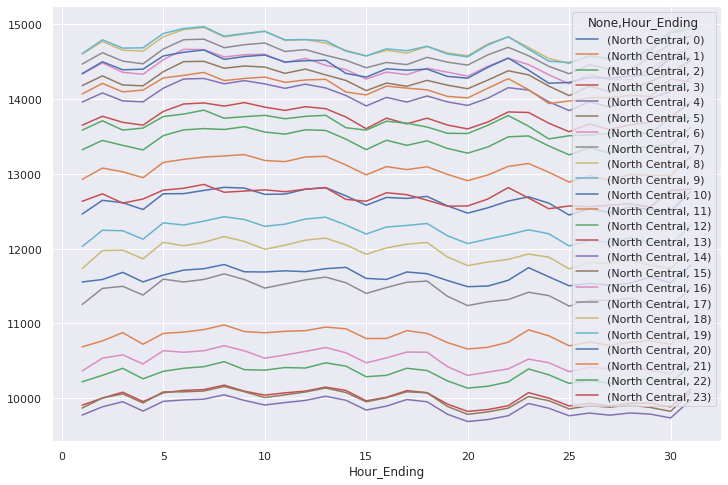

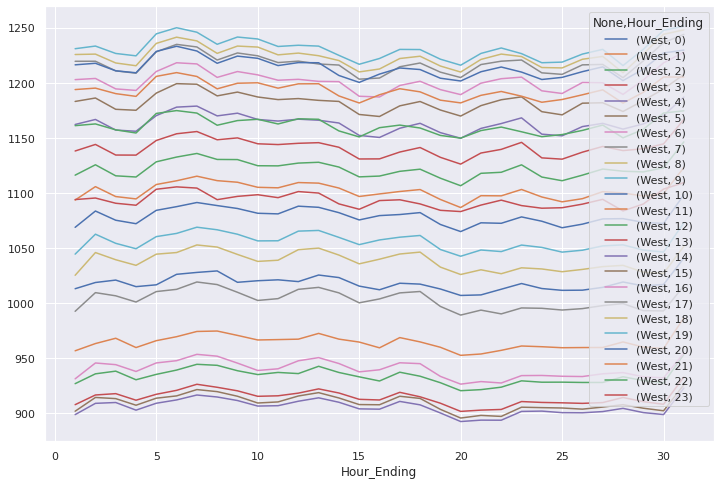

In [76]:
for region in ercot_hourly.columns:
    seasonal_plot(ercot_hourly,season='hour',index='day', column=region)

### Observations
We can notice a seasonality in the following periods:

- 1 year
- 6 months
- 1 month
- 2 weeks
- 1 week
- 1 day

Also we can notice a increasing almost linear trend for all but least North regions.

## Autocorrelation

In [82]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

def auto_corr(data, region):
    fig, ax = plt.subplots(figsize=(25, 10))
    plot_acf(ercot_hourly[[region]].dropna(),lags = 100, ax=ax)
    plt.show()

    # sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(25, 10))
    plot_pacf(ercot_hourly[[region]].dropna(),lags = 180, ax=ax)
    plt.xticks(np.arange(0, 210, step=5))
    plt.show()

## Coast

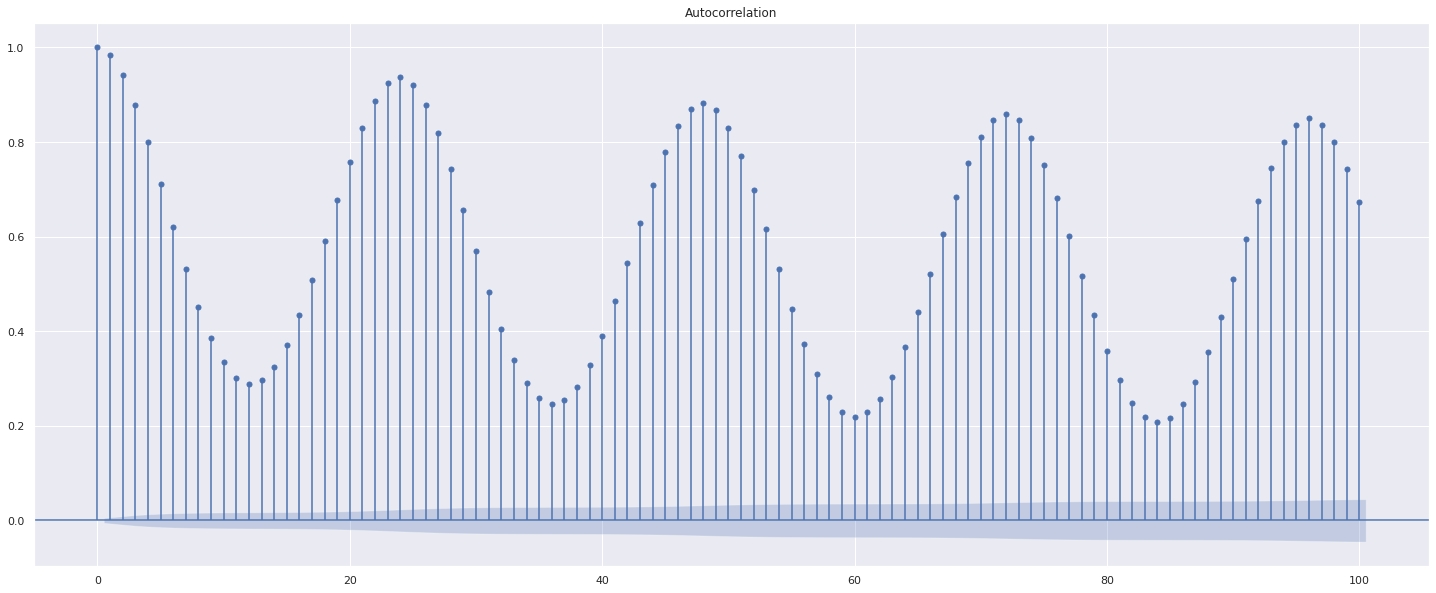

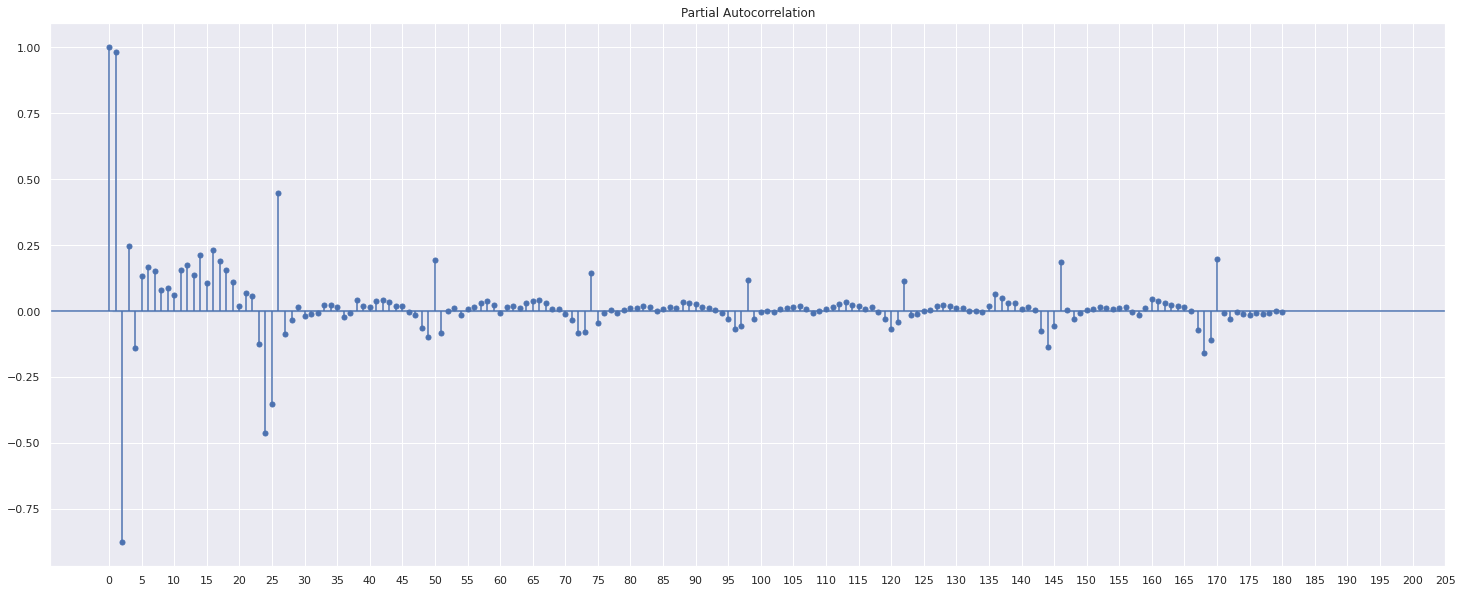

In [83]:
auto_corr(ercot_hourly, 'Coast')

## East

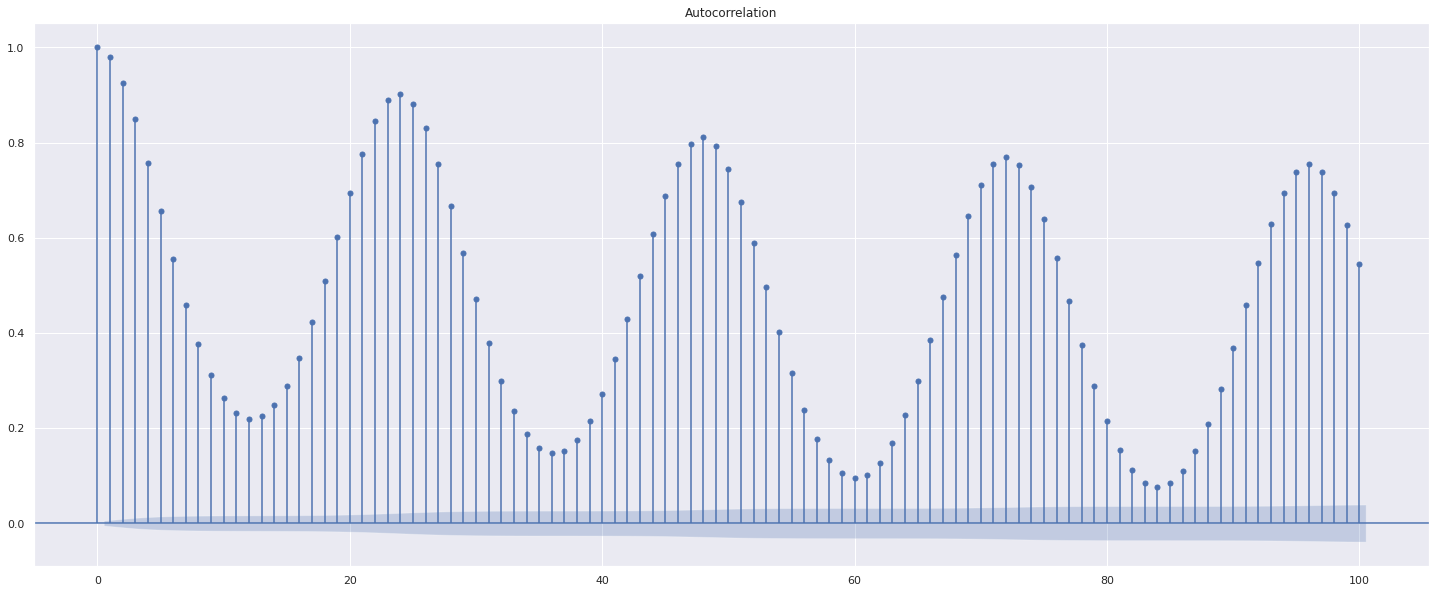

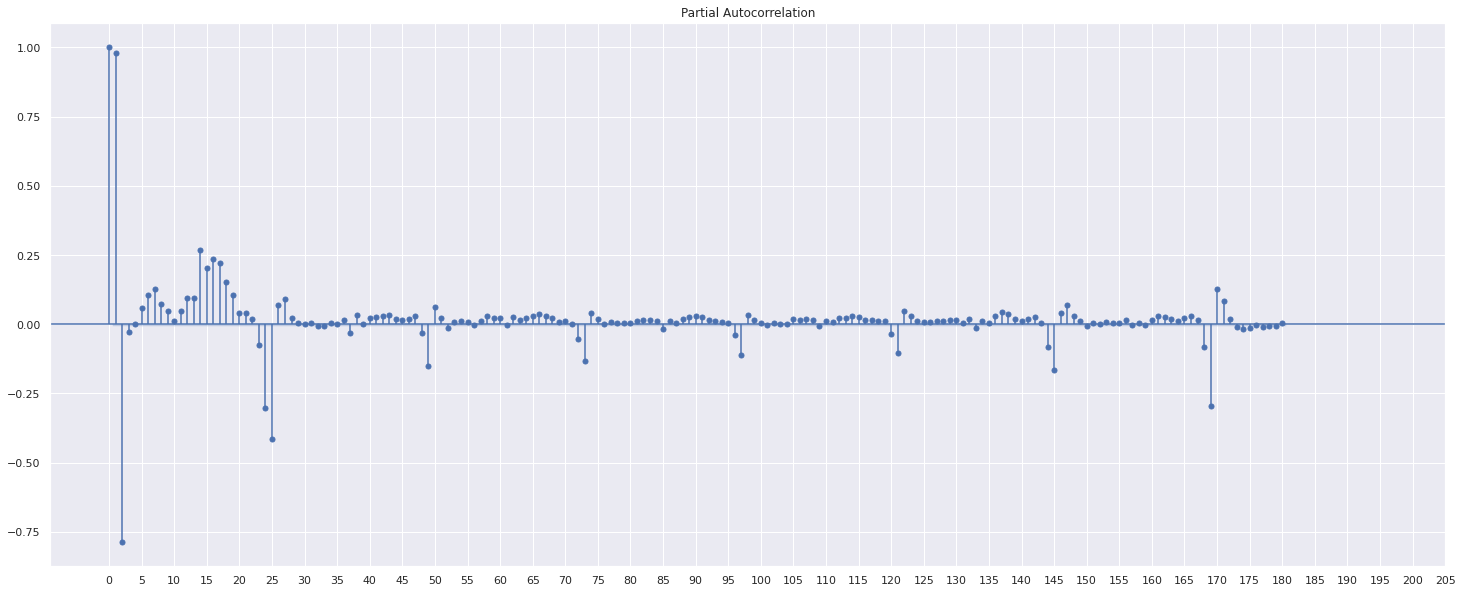

In [84]:
auto_corr(ercot_hourly, 'East')

## Far West

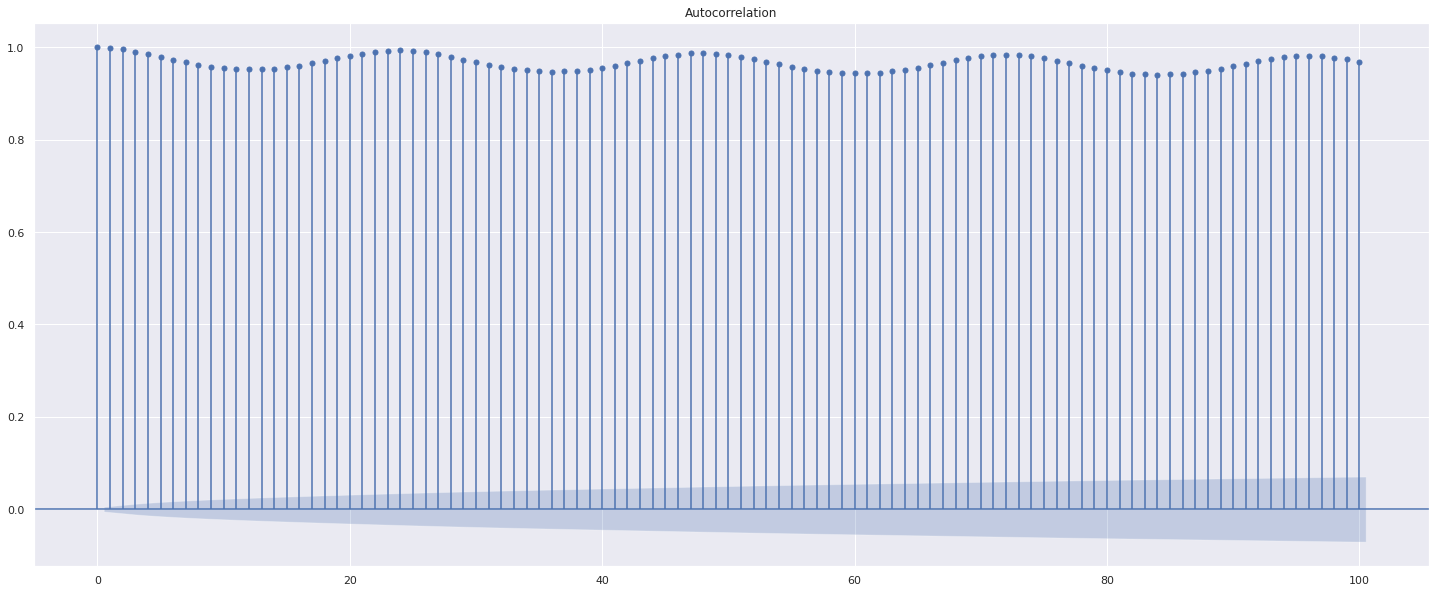

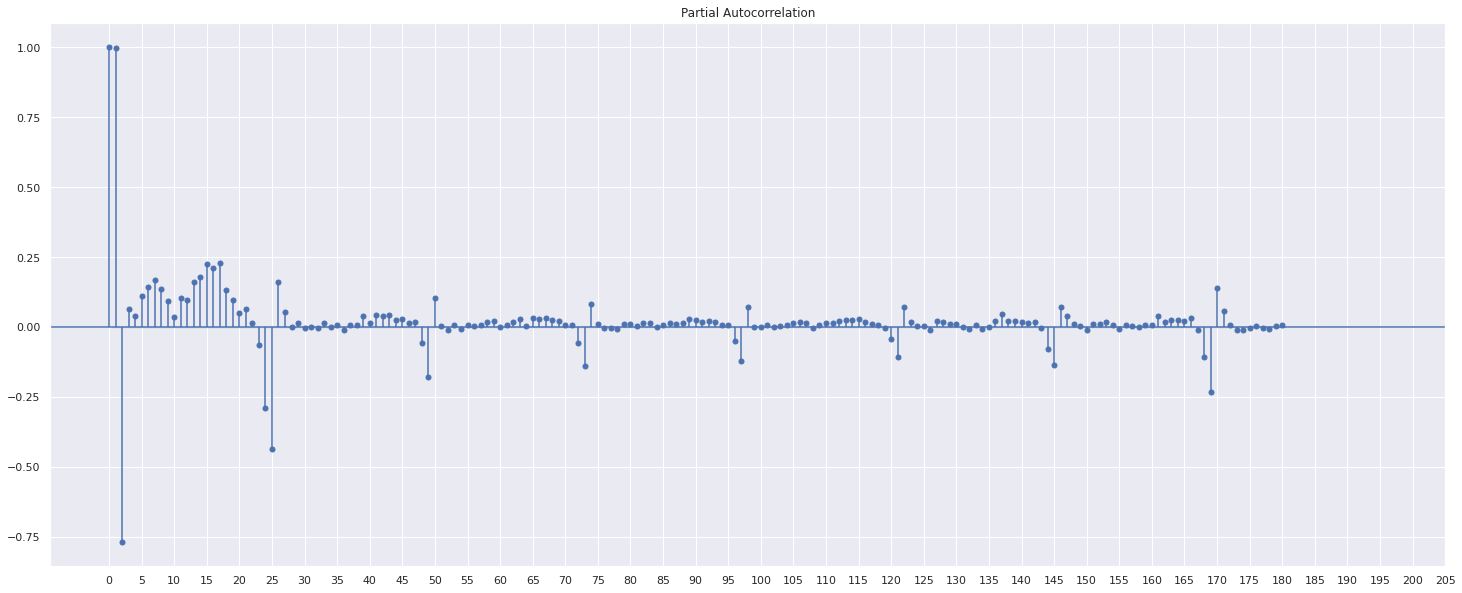

In [85]:
auto_corr(ercot_hourly, 'Far West')

## North

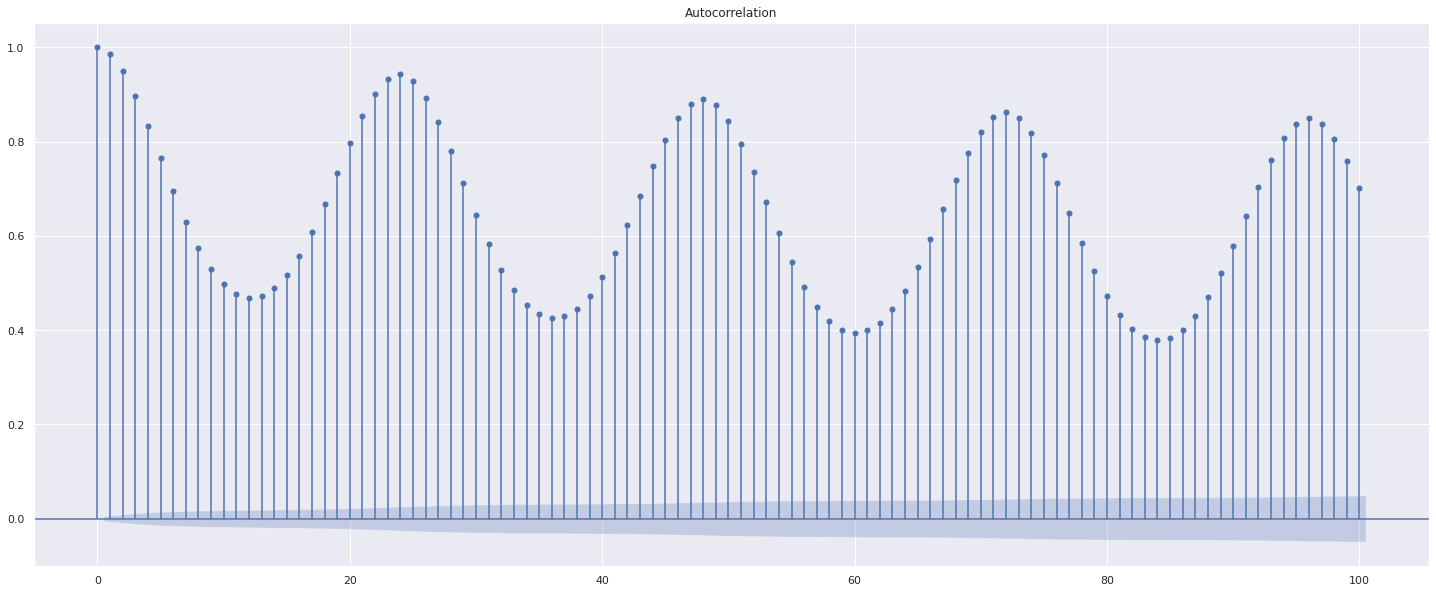

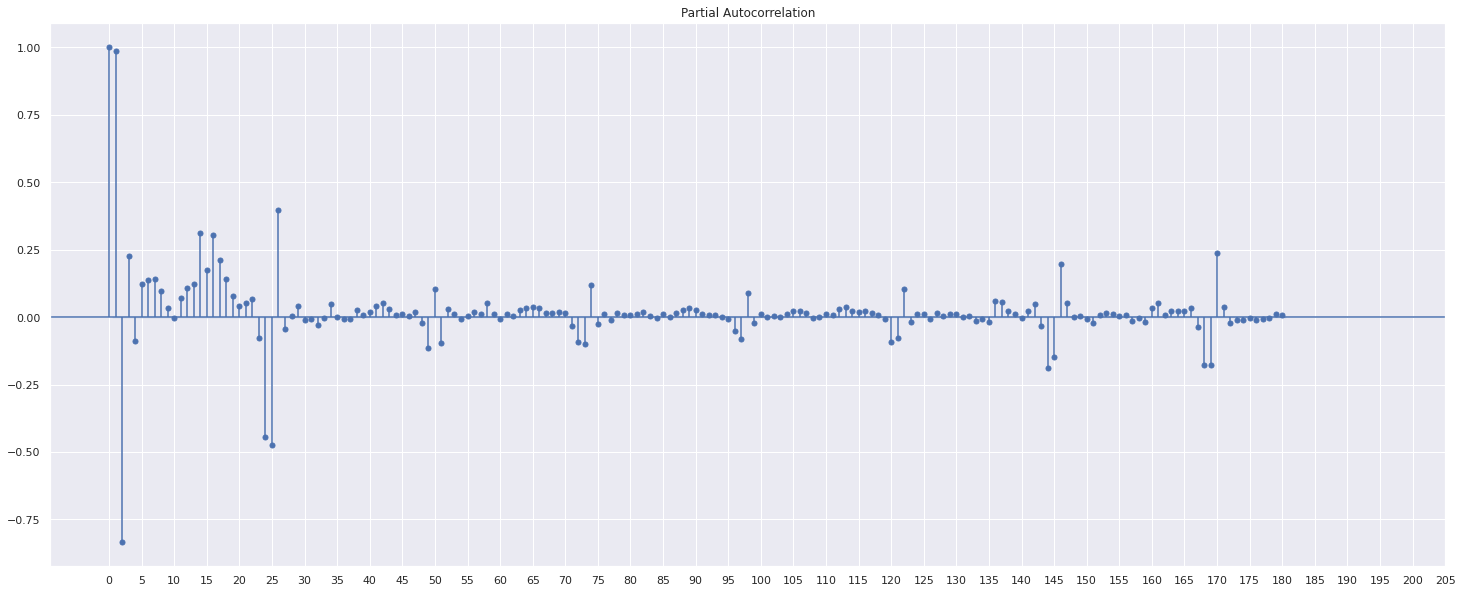

In [86]:
auto_corr(ercot_hourly, 'North')

## North Central

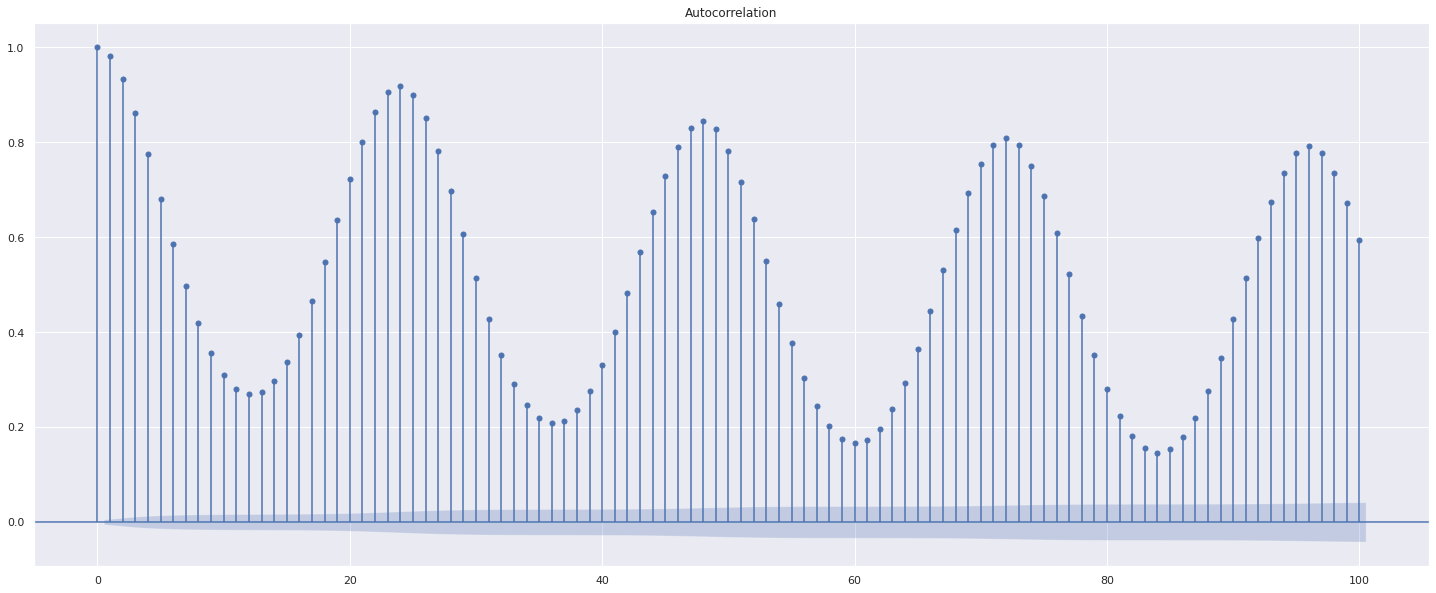

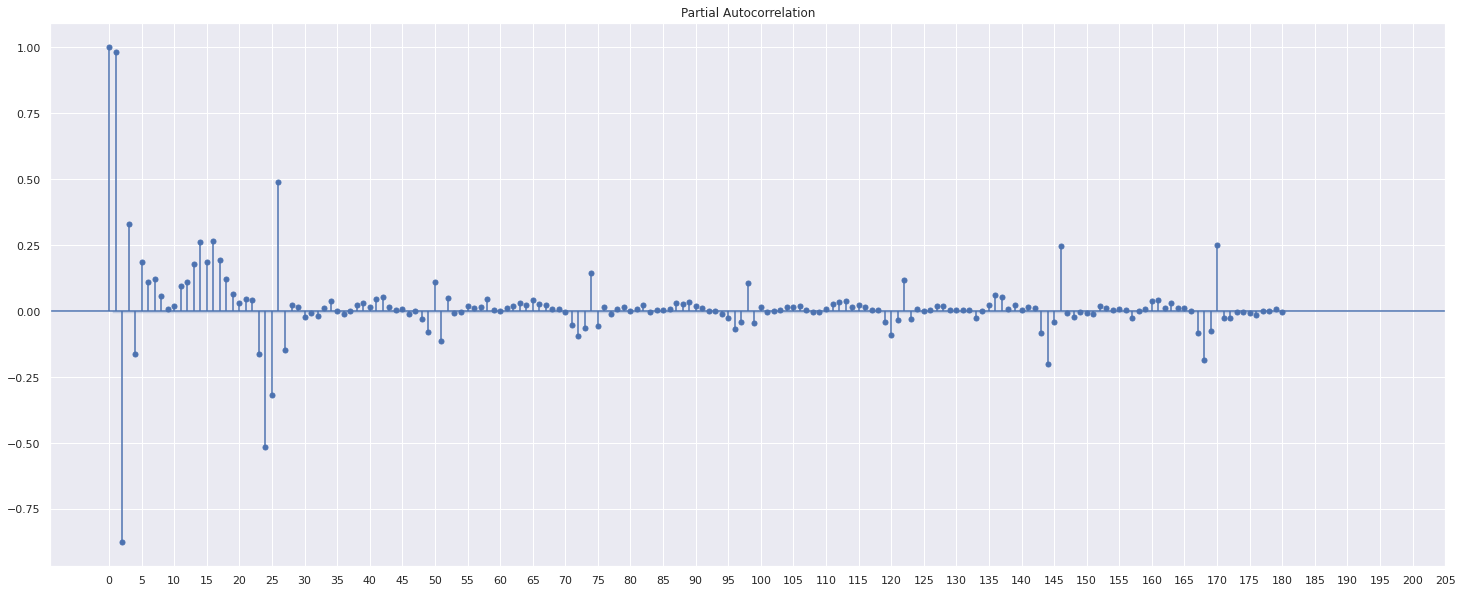

In [87]:
auto_corr(ercot_hourly, 'North Central')

## South

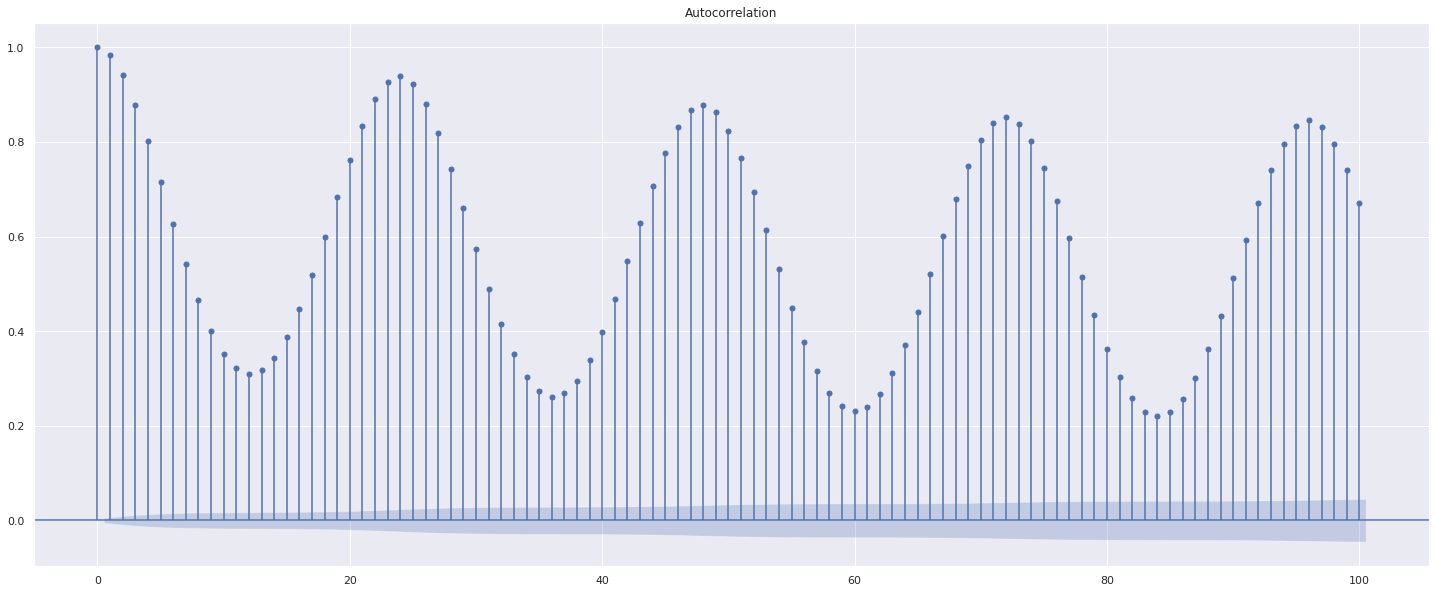

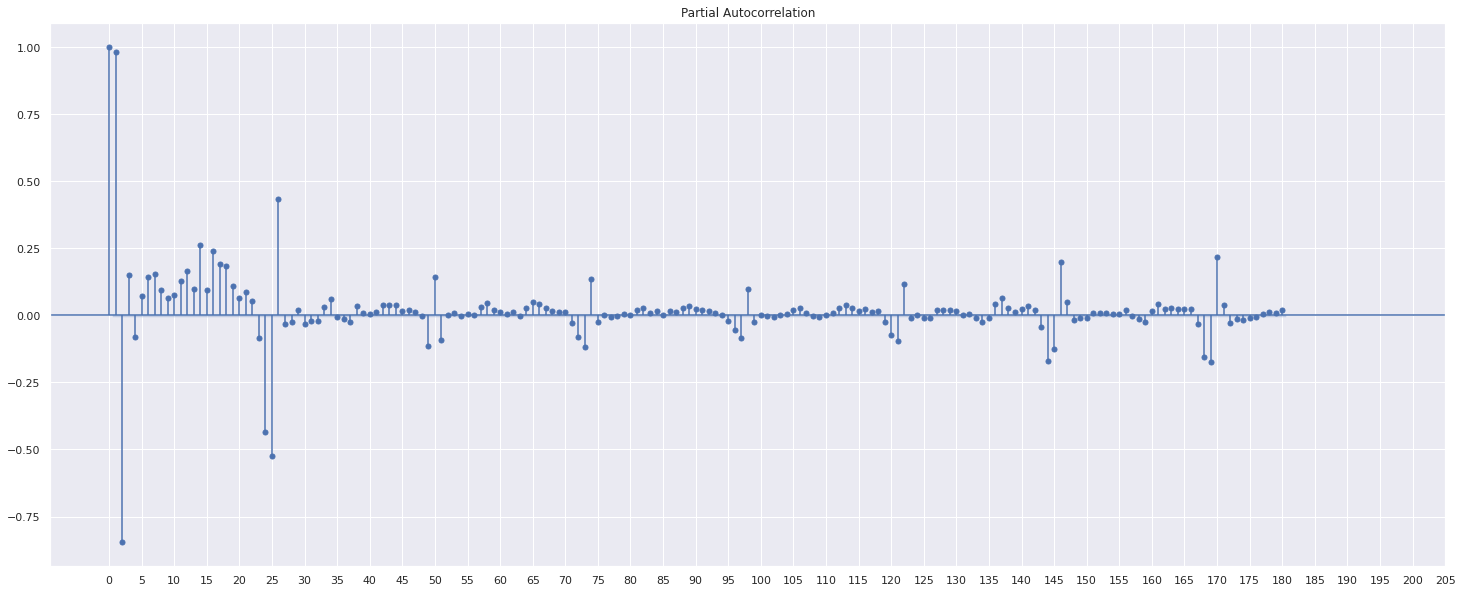

In [88]:
auto_corr(ercot_hourly, 'South')

## South Central

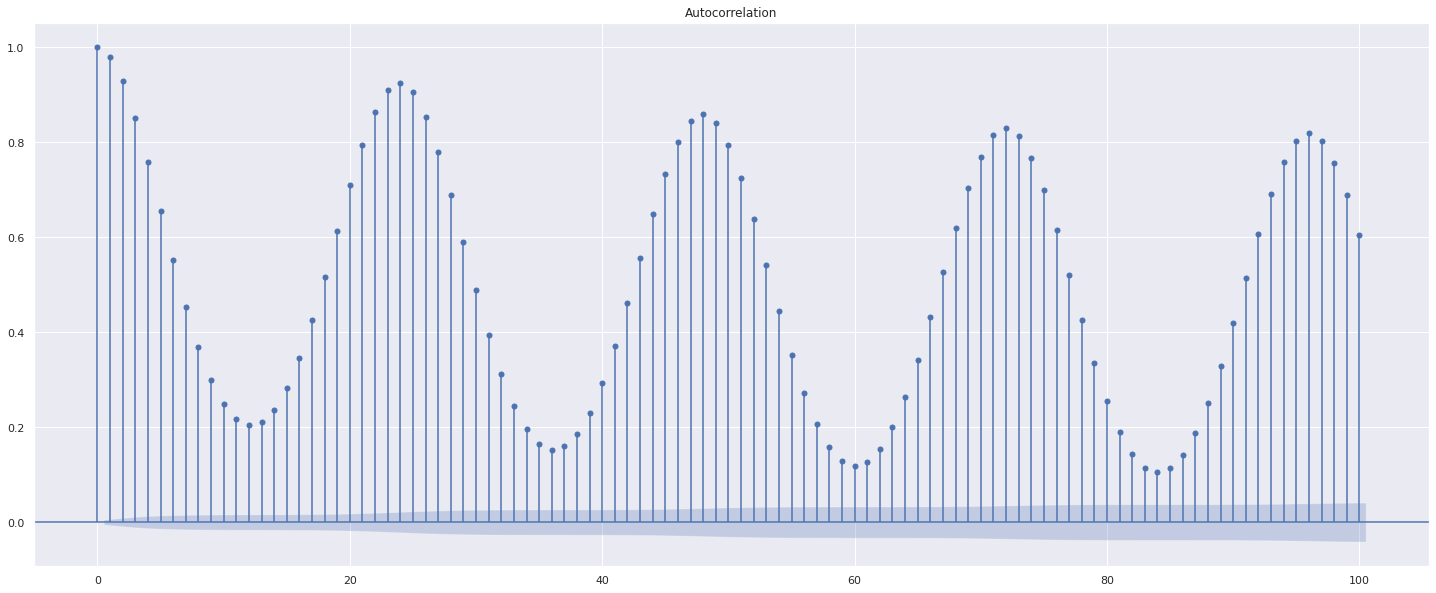

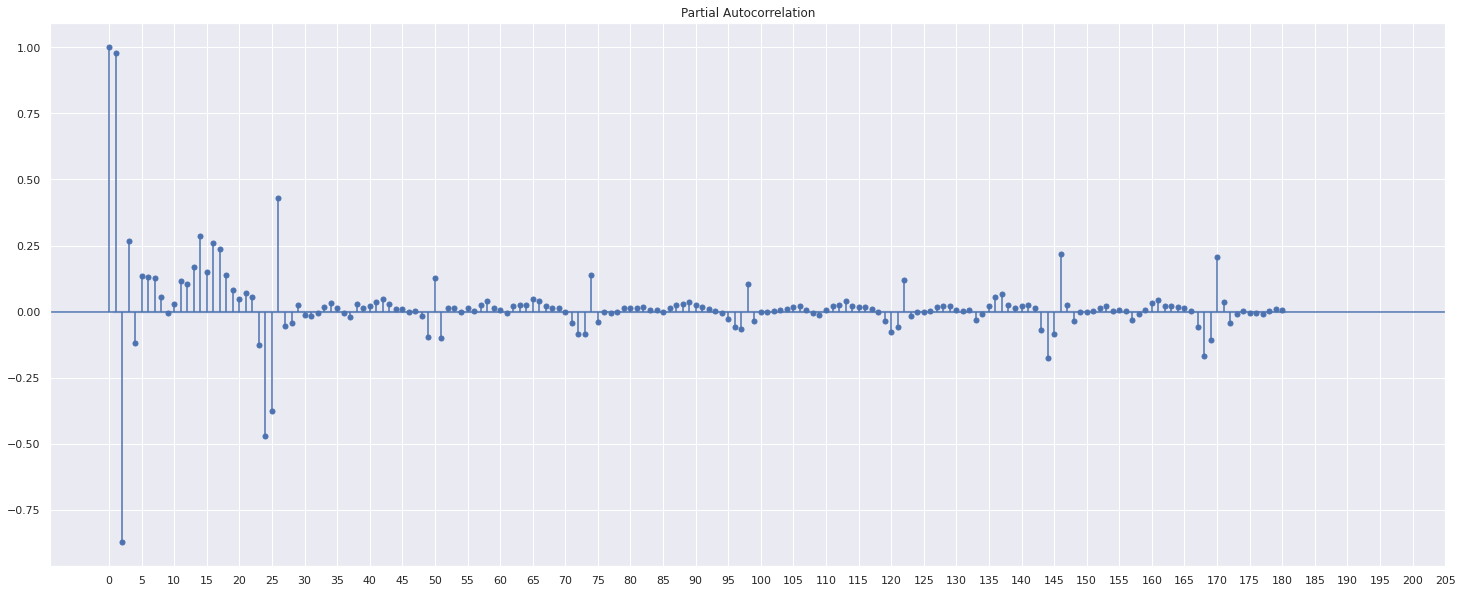

In [89]:
auto_corr(ercot_hourly, 'South Central')

## West

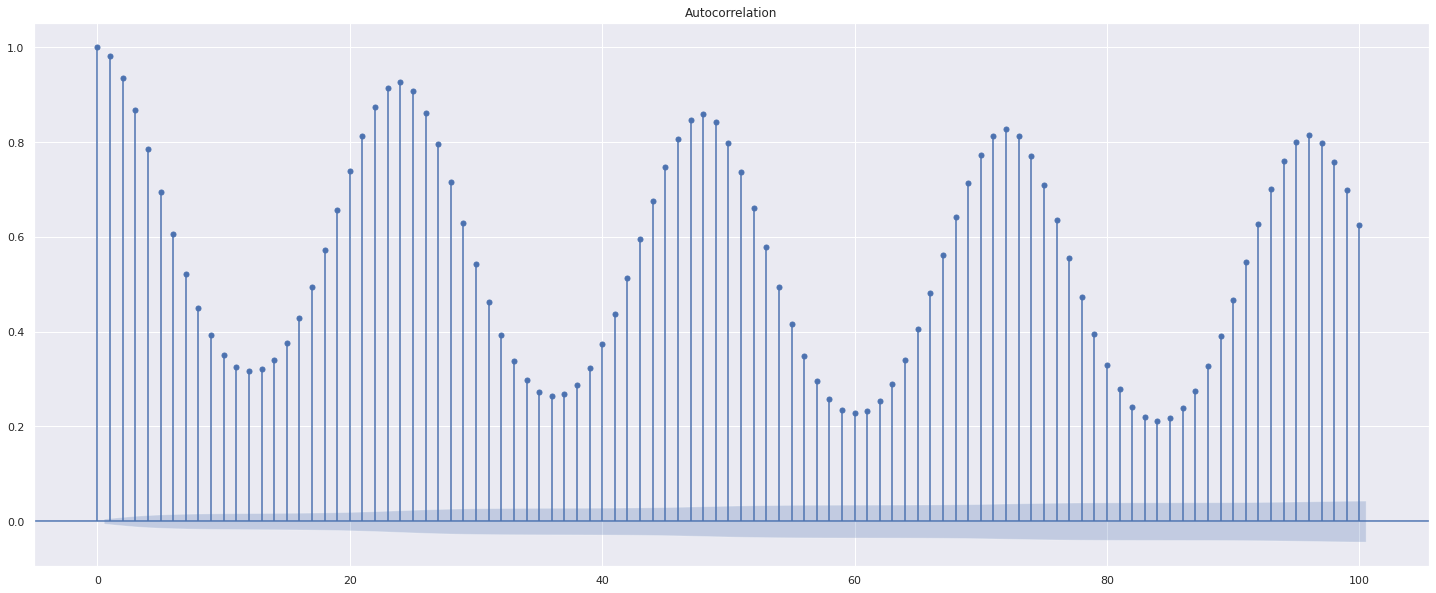

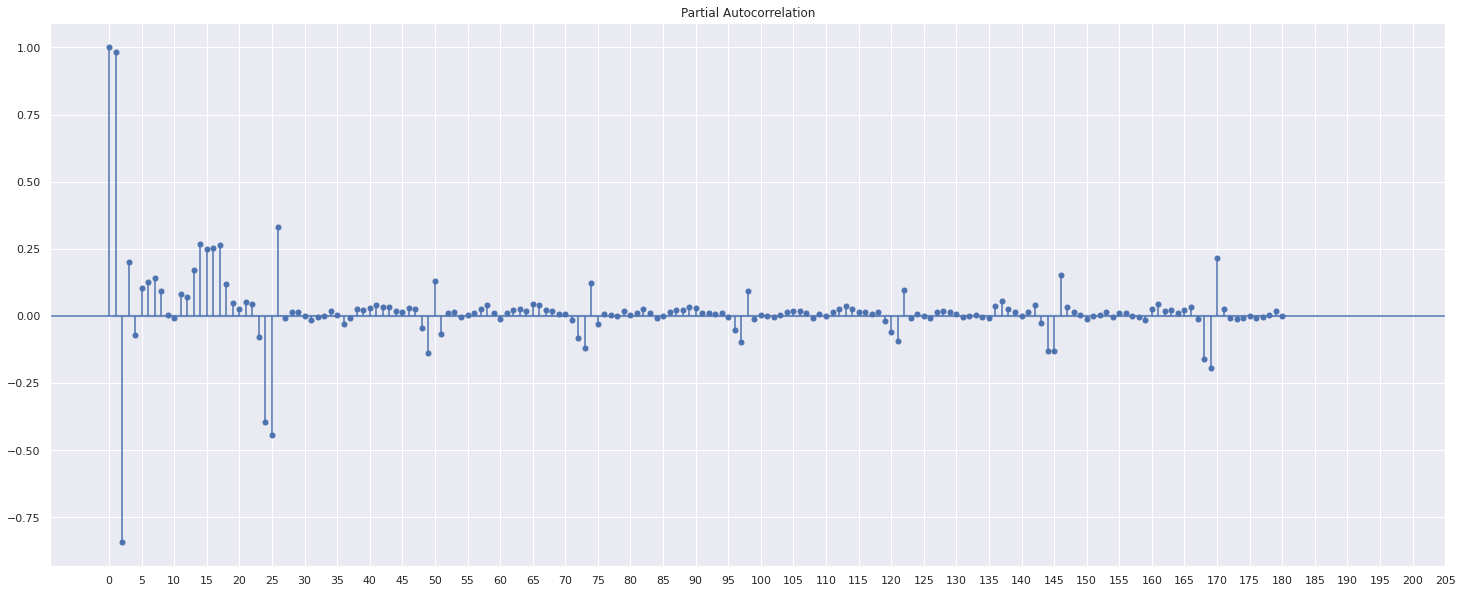

In [90]:
auto_corr(ercot_hourly, 'West')

### Observations:

It is possible to check some important lags:

**Lag [1]** - The previous value

**Lag [2]** - Two second previous value

**Lag [24]** - The value of the previous day

**Lag [24*7]** - The value of the previous week

All of them can help the model predict the next value.

 ### WEATHER X COMSUMPTION

In [91]:
weather_history.head()

date  time            city  tempC  tempF  windspeedMiles  \
0  2008-07-01     0         Abilene     21     70               4   
1  2008-07-01     0          Austin     25     77               6   
2  2008-07-01     0     Brownsville     26     79               5   
3  2008-07-01     0  Corpus Christi     26     78               8   
4  2008-07-01     0          Dallas     25     76               6   

   windspeedKmph  winddirDegree winddir16Point  weatherCode  \
0              7            173              S          113   
1              9            103            ESE          176   
2              8            150            SSE          113   
3             12            146             SE          113   
4              9            149            SSE          113   

            weatherDesc  precipMM  precipInches  humidity  visibility  \
0                 Clear       0.0           0.0        63          10   
1  Patchy rain possible       0.6           0.0        61           9   
2                 Clear       0.0           0.0        86          10   
3                 Clear       0.0           0.0        83          10   
4                 Clear       0.0           0.0        46          10   

   visibilityMiles  pressure  pressureInches  cloudcover  HeatIndexC  \
0                6      1018              31           6          24   
1                5      1018              31          17          26   
2                6      1017              31           8          29   
3                6      1017              30           7          28   
4                6      1018              31           4          25   

   HeatIndexF  DewPointC  DewPointF  WindChillC  WindChillF  WindGustMiles  \
0          76         14         57          21          70              9   
1          80         17         63          25          77             11   
2          84         23         74          26          79              9   
3          83         23         73          26          78             13   
4          78         12         54          25          76             11   

   WindGustKmph  FeelsLikeC  FeelsLikeF  uvIndex  
0            15          21          70        1  
1            18          26          80        1  
2            14          29          84        1  
3            21          28          83        1  
4            18          25          78        1

### Weather Preprocess

In [4]:
# weather history from 2008 to 2021
weather_history = pd.read_csv(path+'/weather_history.csv')

# transform time into hours:minutes
time = {'time':{0:'00:00',300:'03:00',600:'06:00',900:'09:00',1200:'12:00',
                1500:'15:00',1800:'18:00',2100:'21:00'}}
weather_history.replace(time, inplace=True)

# join date + time
weather_history['date'] = weather_history.date + " " + weather_history.time.map(str)
weather_history.drop(columns={'time'}, inplace=True)

# make timeindex
weather_history.date = pd.to_datetime(weather_history.date, utc=True)
weather_history.set_index('date', inplace=True)
weather_history = weather_history.tz_convert('US/Central') # Time zone adjustment

# transform city to region
city_region = {'Wichita Falls':'North',
               'Tyler':'East',
               'Corpus Christi':'South',
               'Brownsville':'South',
               'Dallas':'North Central',
               'Austin':'South Central',
               'Midland':'Far West',
               'San Antonio':'South Central',
               'Houston':'Coast',
               'Abilene':'West'}

weather_history['region'] = weather_history.city.replace(city_region)

In [143]:
weather_history.head()

city  tempC  tempF  windspeedMiles  \
date                                                                      
2008-06-30 19:00:00-05:00         Abilene     21     70               4   
2008-06-30 19:00:00-05:00          Austin     25     77               6   
2008-06-30 19:00:00-05:00     Brownsville     26     79               5   
2008-06-30 19:00:00-05:00  Corpus Christi     26     78               8   
2008-06-30 19:00:00-05:00          Dallas     25     76               6   

                           windspeedKmph  winddirDegree winddir16Point  \
date                                                                     
2008-06-30 19:00:00-05:00              7            173              S   
2008-06-30 19:00:00-05:00              9            103            ESE   
2008-06-30 19:00:00-05:00              8            150            SSE   
2008-06-30 19:00:00-05:00             12            146             SE   
2008-06-30 19:00:00-05:00              9            149            SSE   

                           weatherCode           weatherDesc  precipMM  \
date                                                                     
2008-06-30 19:00:00-05:00          113                 Clear       0.0   
2008-06-30 19:00:00-05:00          176  Patchy rain possible       0.6   
2008-06-30 19:00:00-05:00          113                 Clear       0.0   
2008-06-30 19:00:00-05:00          113                 Clear       0.0   
2008-06-30 19:00:00-05:00          113                 Clear       0.0   

                           precipInches  humidity  visibility  \
date                                                            
2008-06-30 19:00:00-05:00           0.0        63          10   
2008-06-30 19:00:00-05:00           0.0        61           9   
2008-06-30 19:00:00-05:00           0.0        86          10   
2008-06-30 19:00:00-05:00           0.0        83          10   
2008-06-30 19:00:00-05:00           0.0        46          10   

                           visibilityMiles  pressure  pressureInches  \
date                                                                   
2008-06-30 19:00:00-05:00                6      1018              31   
2008-06-30 19:00:00-05:00                5      1018              31   
2008-06-30 19:00:00-05:00                6      1017              31   
2008-06-30 19:00:00-05:00                6      1017              30   
2008-06-30 19:00:00-05:00                6      1018              31   

                           cloudcover  HeatIndexC  HeatIndexF  DewPointC  \
date                                                                       
2008-06-30 19:00:00-05:00           6          24          76         14   
2008-06-30 19:00:00-05:00          17          26          80         17   
2008-06-30 19:00:00-05:00           8          29          84         23   
2008-06-30 19:00:00-05:00           7          28          83         23   
2008-06-30 19:00:00-05:00           4          25          78         12   

                           DewPointF  WindChillC  WindChillF  WindGustMiles  \
date                                                                          
2008-06-30 19:00:00-05:00         57          21          70              9   
2008-06-30 19:00:00-05:00         63          25          77             11   
2008-06-30 19:00:00-05:00         74          26          79              9   
2008-06-30 19:00:00-05:00         73          26          78             13   
2008-06-30 19:00:00-05:00         54          25          76             11   

                           WindGustKmph  FeelsLikeC  FeelsLikeF  uvIndex  \
date                                                                       
2008-06-30 19:00:00-05:00            15          21          70        1   
2008-06-30 19:00:00-05:00            18          26          80        1   
2008-06-30 19:00:00-05:00            14          29          84        1   
2008-06-30 19:00:00-05:00            21      

In [107]:
weather_history.groupby(by='region').describe()

tempC                                                      \
                 count       mean        std   min   25%   50%   75%   max   
region                                                                       
Coast          37848.0  21.481531   7.764724 -12.0  16.0  23.0  27.0  42.0   
East           37848.0  18.441978   9.206466 -20.0  12.0  19.0  25.0  45.0   
Far West       37848.0  19.053953   9.682340 -16.0  12.0  20.0  26.0  43.0   
North          37848.0  18.230157  10.443810 -21.0  10.0  19.0  26.0  44.0   
North Central  37848.0  19.618104   9.471449 -16.0  13.0  20.0  27.0  43.0   
South          75696.0  23.563980   6.452192  -8.0  20.0  25.0  28.0  40.0   
South Central  75696.0  20.715124   8.480741 -12.0  15.0  22.0  27.0  43.0   
West           37848.0  18.823795   9.860227 -18.0  12.0  20.0  26.0  42.0   

                 tempF                                                       \
                 count       mean        std   min   25%   50%   75%    max   
region                                                                        
Coast          37848.0  70.594087  13.970757  10.0  61.0  73.0  80.0  107.0   
East           37848.0  65.122067  16.556501  -4.0  53.0  67.0  77.0  112.0   
Far West       37848.0  66.218453  17.408547   3.0  53.0  68.0  80.0  109.0   
North          37848.0  64.742391  18.776084  -6.0  51.0  66.0  79.0  111.0   
North Central  37848.0  67.246142  17.034401   3.0  55.0  68.0  80.0  110.0   
South          75696.0  74.340243  11.610688  19.0  68.0  76.0  82.0  104.0   
South Central  75696.0  69.211610  15.256172  10.0  59.0  71.0  80.0  110.0   
West           37848.0  65.811747  17.731193   0.0  53.0  67.0  79.0  108.0   

              windspeedMiles                                                   \
                       count       mean       std  min  25%   50%   75%   max   
region                                                                          
Coast                37848.0   7.346121  3.553552  0.0  5.0   7.0   9.0  32.0   
East                 37848.0   6.847125  3.296137  0.0  4.0   6.0   9.0  25.0   
Far West             37848.0  11.882213  5.226330  0.0  8.0  11.0  15.0  42.0   
North                37848.0   9.921925  4.618584  0.0  6.0   9.0  13.0  34.0   
North Central        37848.0   8.500555  4.227805  0.0  5.0   8.0  11.0  50.0   
South                75696.0  10.804468  4.741073  0.0  7.0  11.0  14.0  48.0   
South Central        75696.0   8.018270  3.849860  0.0  5.0   7.0  10.0  32.0   
West                 37848.0  11.593717  5.112179  0.0  8.0  11.0  15.0  36.0   

              windspeedKmph                                                    \
                      count       mean       std  min   25%   50%   75%   max   
region                                                                          
Coast               37848.0  11.822765  5.673777  0.0   8.0  11.0  15.0  52.0   
East                37848.0  11.025919  5.256332  0.0   7.0  10.0  14.0  40.0   
Far West            37848.0  19.102304  8.404798  0.0  13.0  18.0  24.0  68.0   
North               37848.0  15.958518  7.413137  0.0  10.0  15.0  21.0  55.0   
North Central       37848.0  13.672004  6.767760  0.0   9.0  13.0  18.0  80.0   
South               75696.0  17.367259  7.611409  0.0  12.0  17.0  22.0  77.0   
South Central       75696.0  12.900127  6.152746  0.0   9.0  12.0  17.0  52.0   
West                37848.0  18.643944  8.219310  0.0  13.0  18.0  24.0  58.0   

              winddirDegree                                                   \
                      count        mean        std  min    25%    50%    75%   
region                                                                         
Coast               37848.0  163.498230  91.133341  0.0  105.0  160.0  206.0   
East                37848.0  171.005628  89.404563  0.0  113.0  173.0  215.0   
Far West            37848.0  167.365832  75.063997  0.0  125.0  170.0  207.0   
North               3784

## Coast

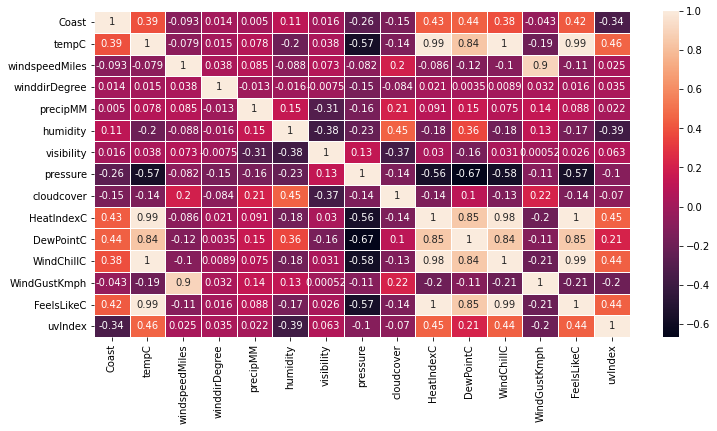

In [34]:
coast = hourly_weather('Coast', weather_history)
plot_corrMap(coast, weather_history)

## Far West

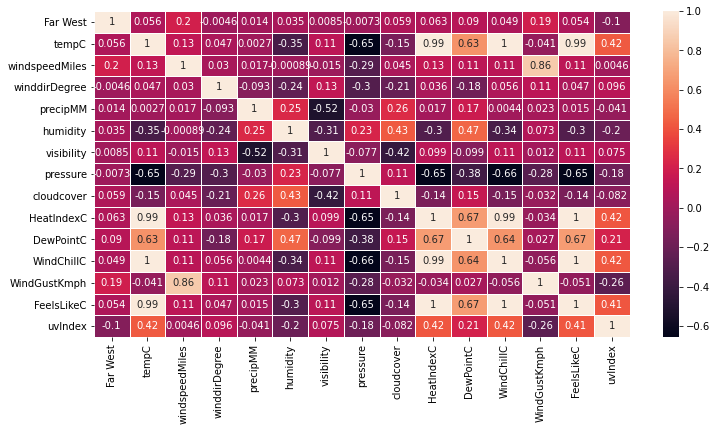

In [35]:
fWest = hourly_weather('Far West', weather_history)
plot_corrMap(fWest, weather_history)

## North

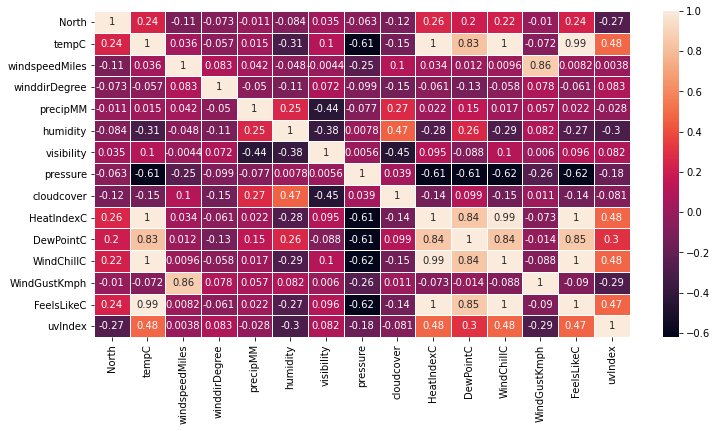

In [36]:
north = hourly_weather('North', weather_history)
plot_corrMap(north, weather_history)

## East

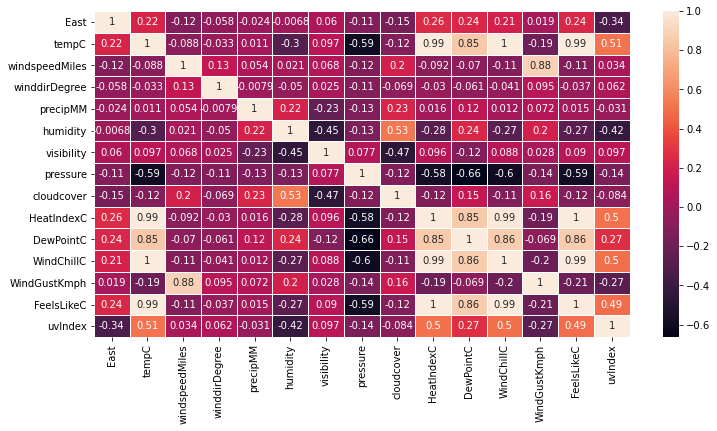

In [37]:
east = hourly_weather('East', weather_history)
plot_corrMap(east, weather_history)

## North Central

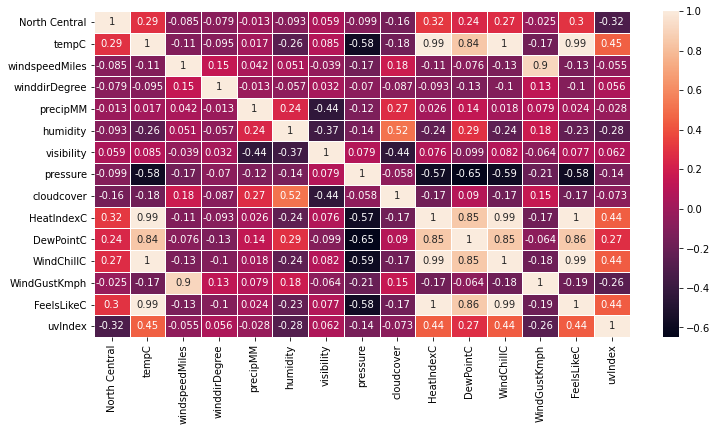

In [38]:
northC = hourly_weather('North Central', weather_history)
plot_corrMap(northC, weather_history)

## South

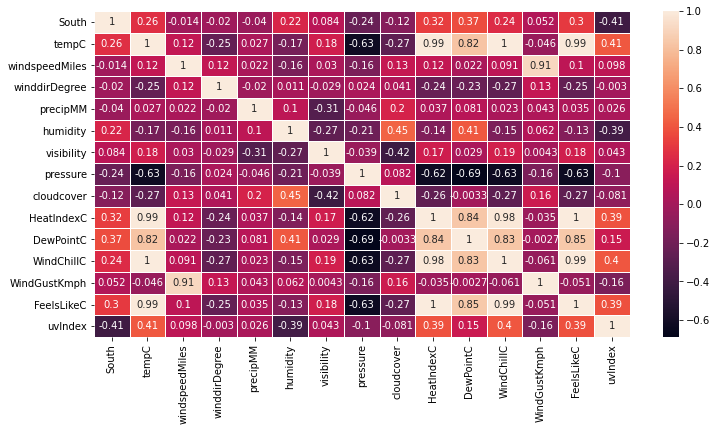

In [39]:
south = hourly_weather('South', weather_history)
plot_corrMap(south, weather_history)

## South Central

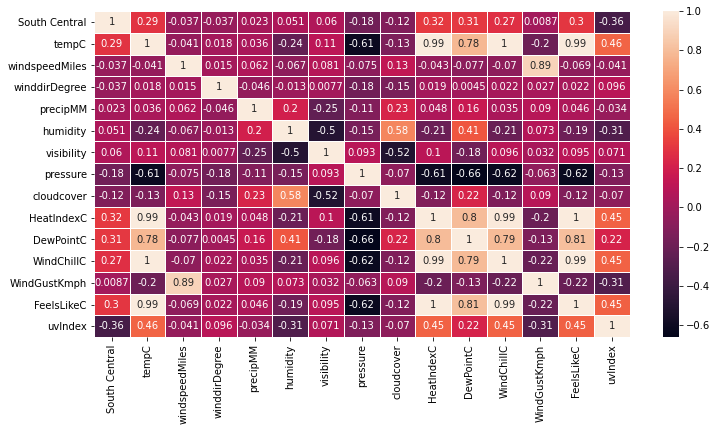

In [40]:
southC = hourly_weather('South Central', weather_history)
plot_corrMap(southC, weather_history)

## West

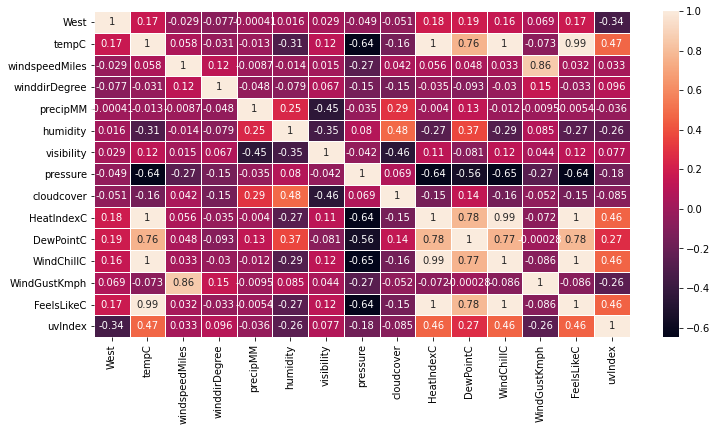

In [41]:
west = hourly_weather('West', weather_history)
plot_corrMap(west, weather_history)

### Observations:

HeatIndex and DewPointC seems the best candidates for weather features.
tempC has a correlation of 1 with HeatIndex but its not best correlated with power comsumption them HeatIndex. 
DewPointC has huge correlation with tempC but we can try it. We can try uvIndex also.
PS: Far West will need a separate feature engineering.